# Notebook for the compuation of the hash-based similarities

Containing methods and functionality for computing and measuring similarities from the hashes

In [1]:
from experiments.grid_resolution import plot_grid_res_layers
from experiments.disk_resolution import plot_disk_dia_layers
from experiments.disk_resolution import plot_disk_numbers


/cluster/home/amalieur/master/code/experiments/disk_resolution.py:162: SyntaxWarning: invalid escape sequence '\-'
  ax2.set_ylabel("Standard deviation \- Dashed lines", fontsize=18)


In [2]:
#Test-plot
plot_grid_res_layers("porto", [1,2,3,4], [0.2, 5, 0.2], parallell_jobs=20, reference="frechet")


Exception: Cant find file ../data/hashed_data/grid/porto/META-50.TXT

## Grid Porto

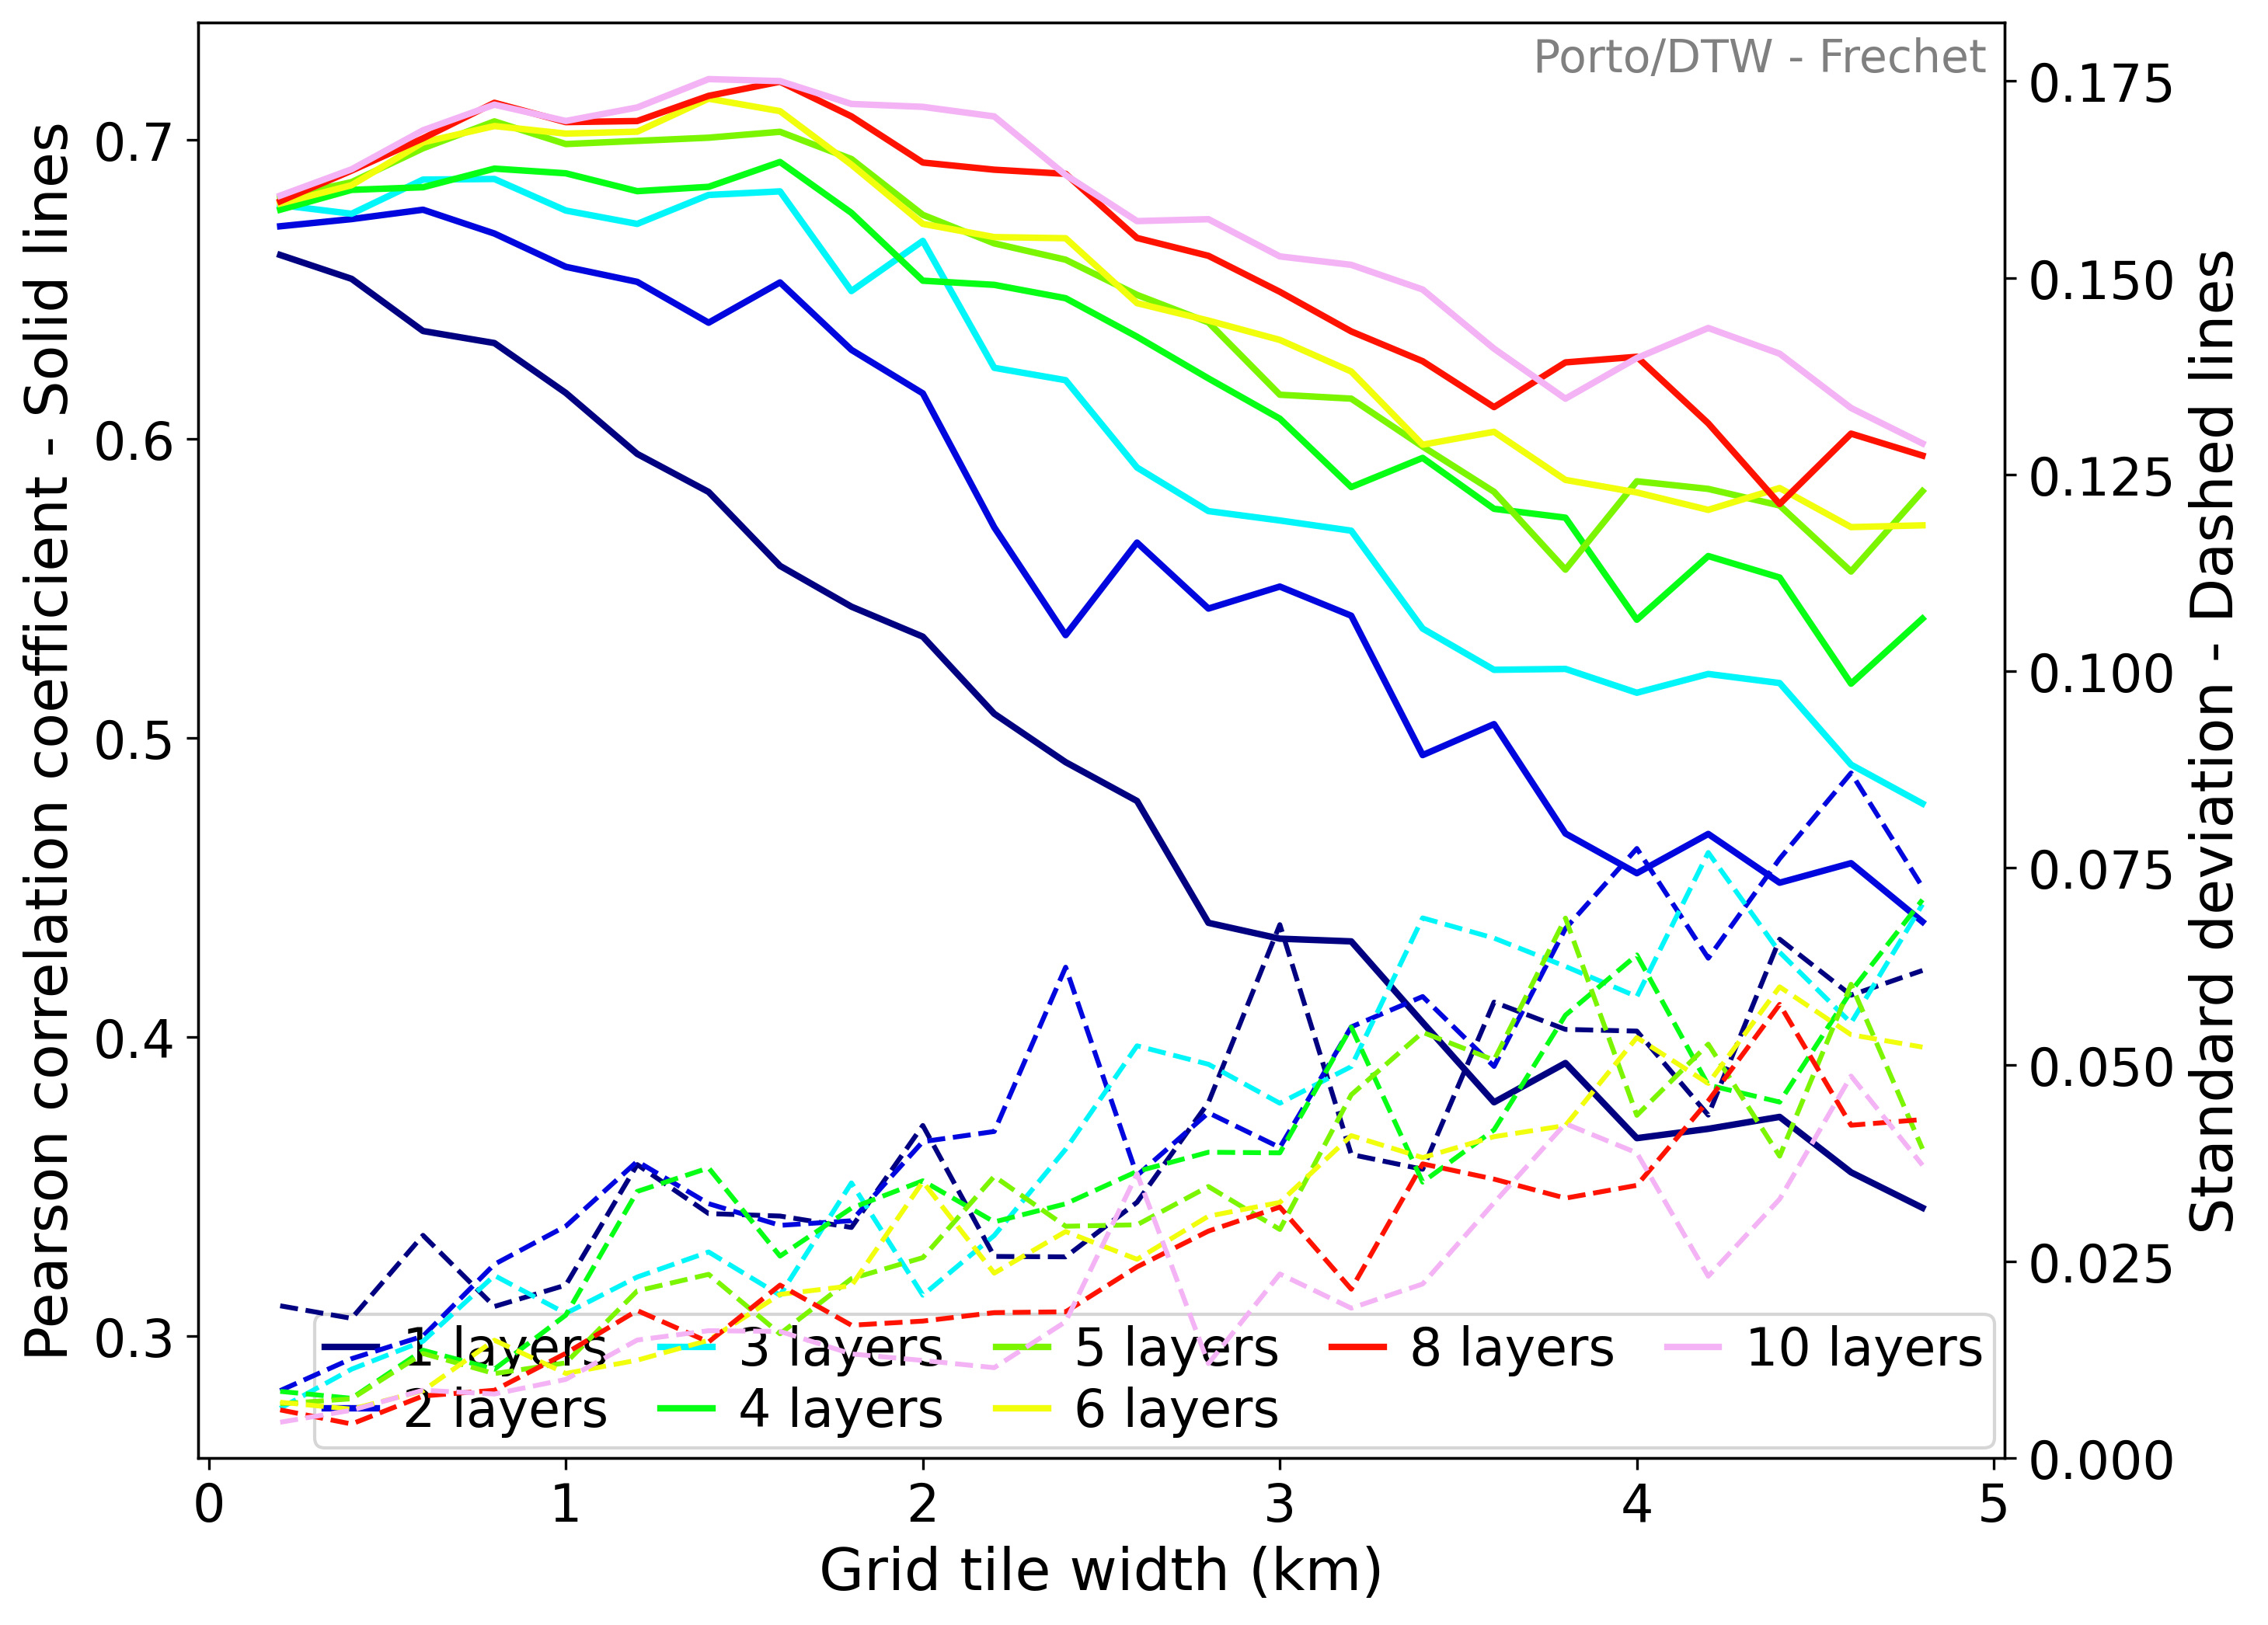

In [ ]:
# Porto/DTW - Frechet
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], parallell_jobs=20, reference="frechet")

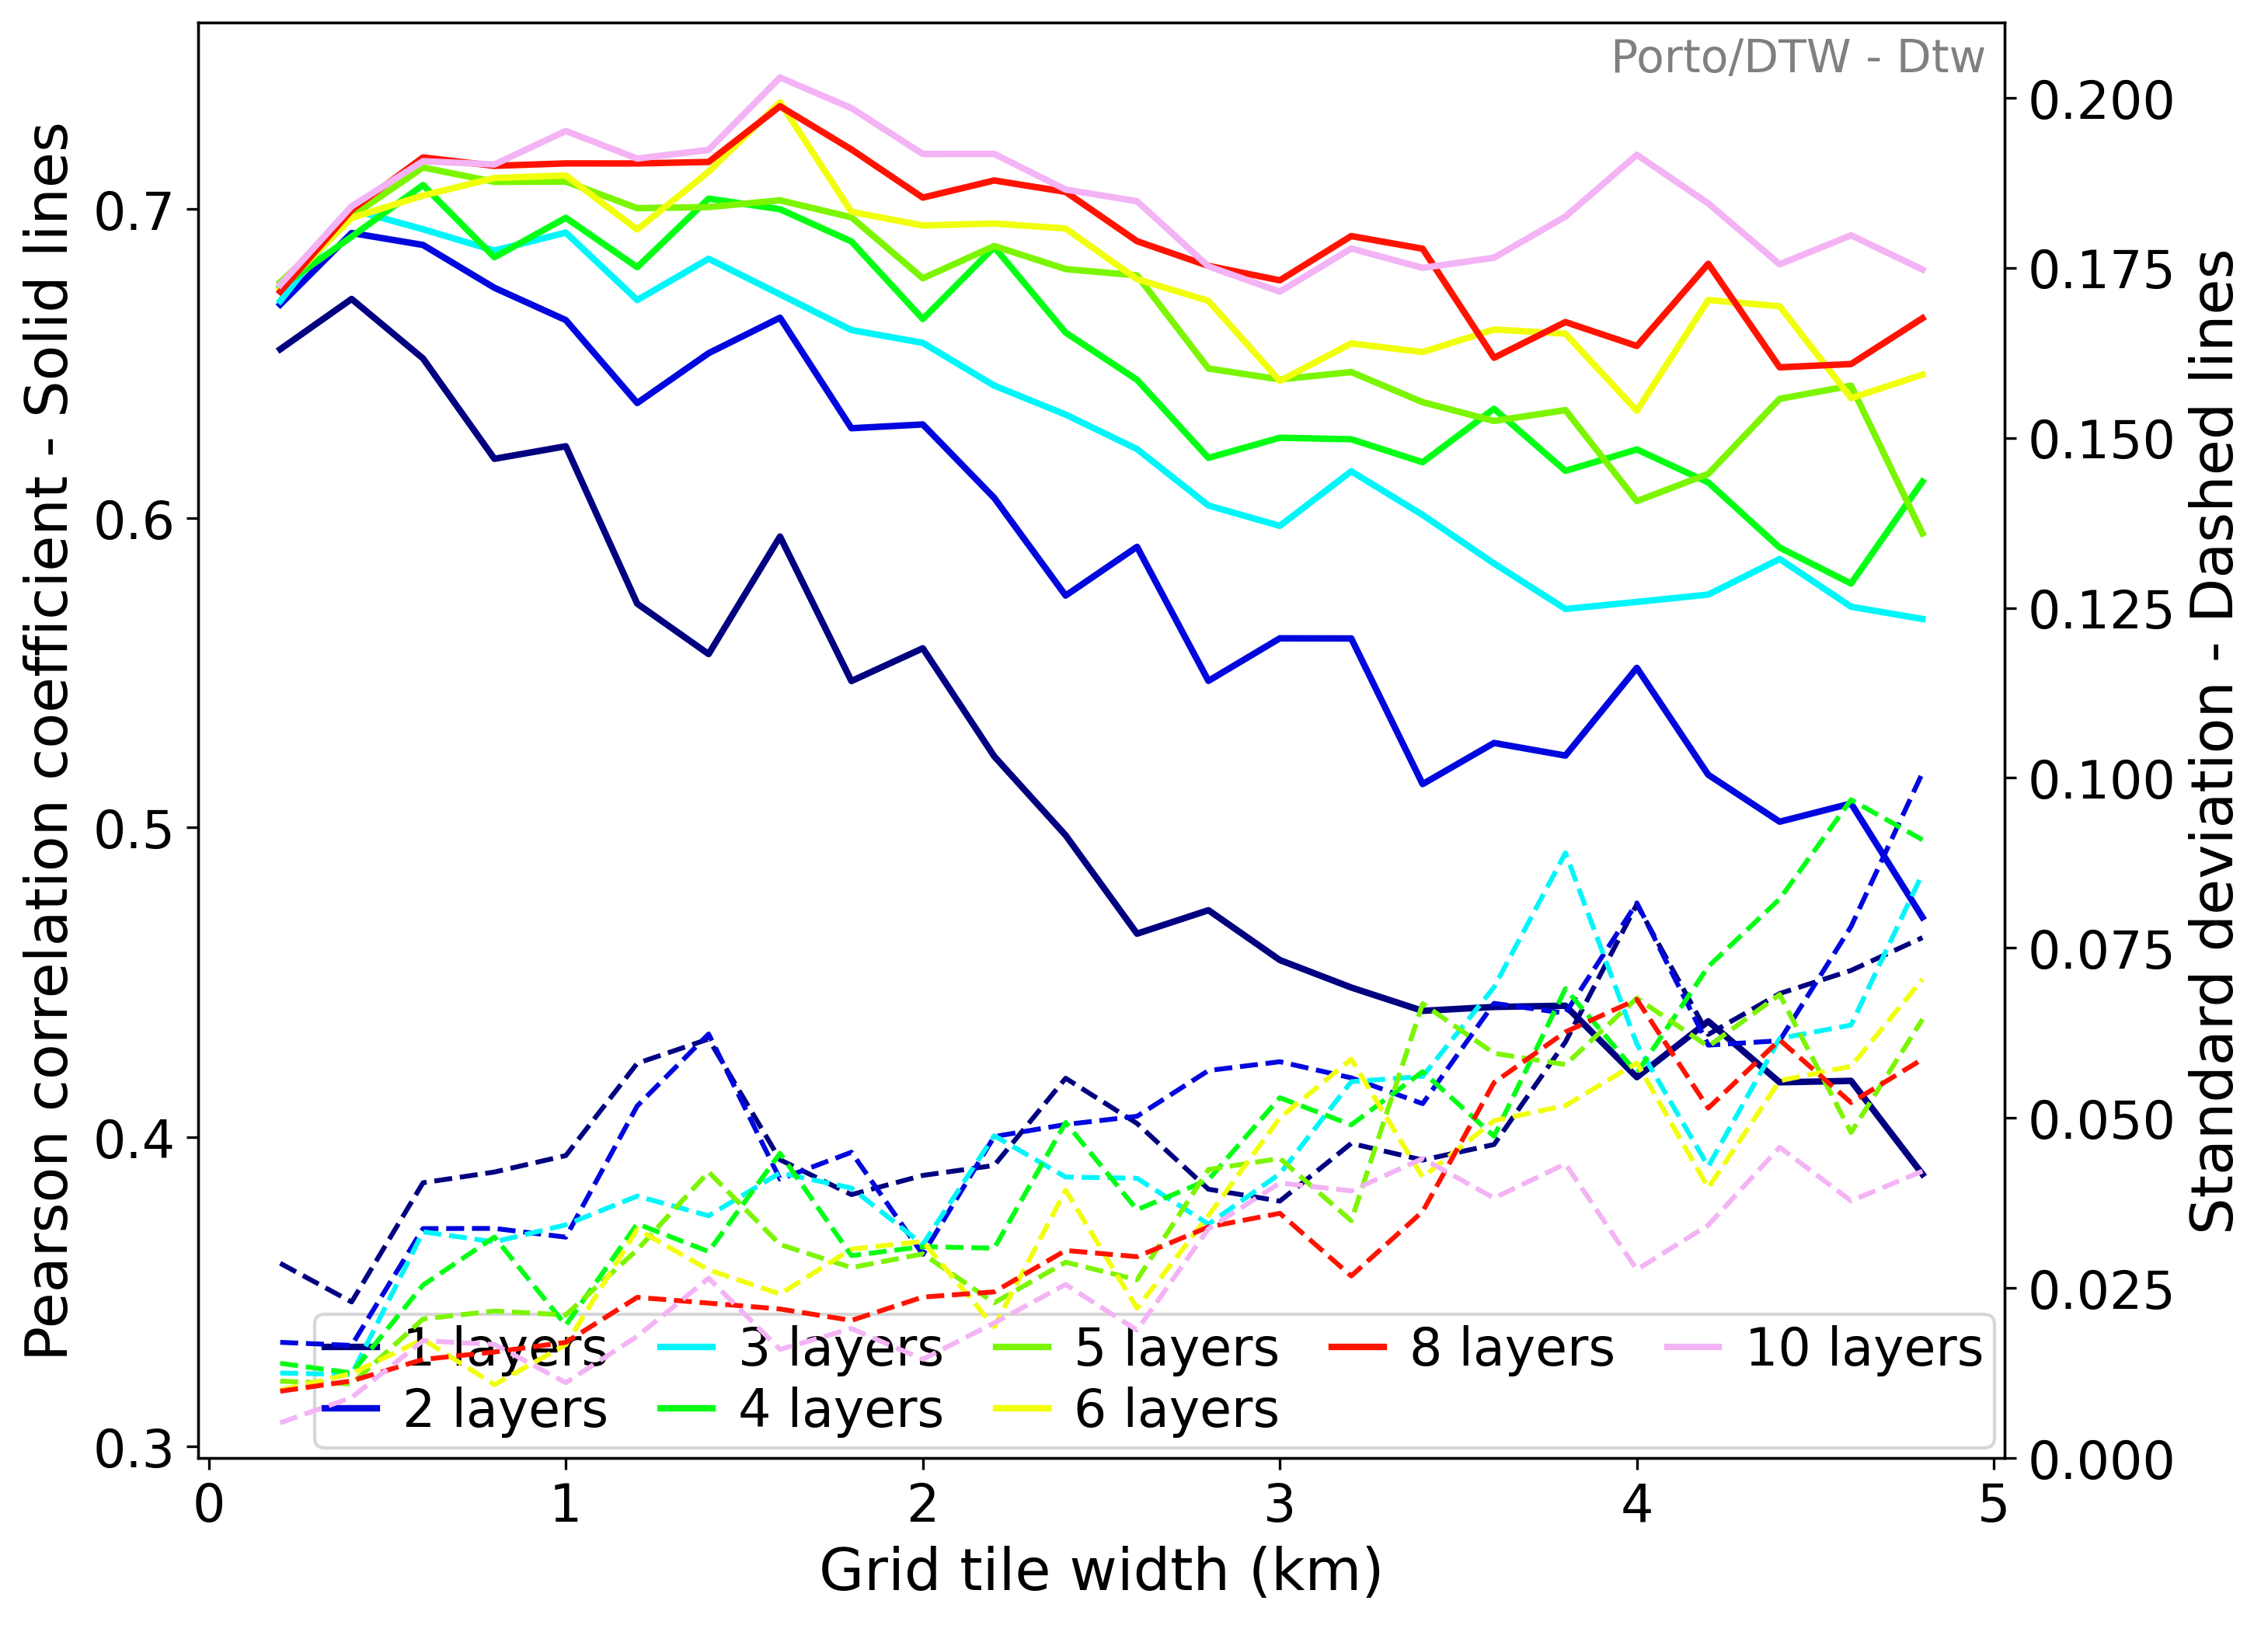

In [ ]:
# Porto/DTW - DTW
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], parallell_jobs=20, reference="dtw")

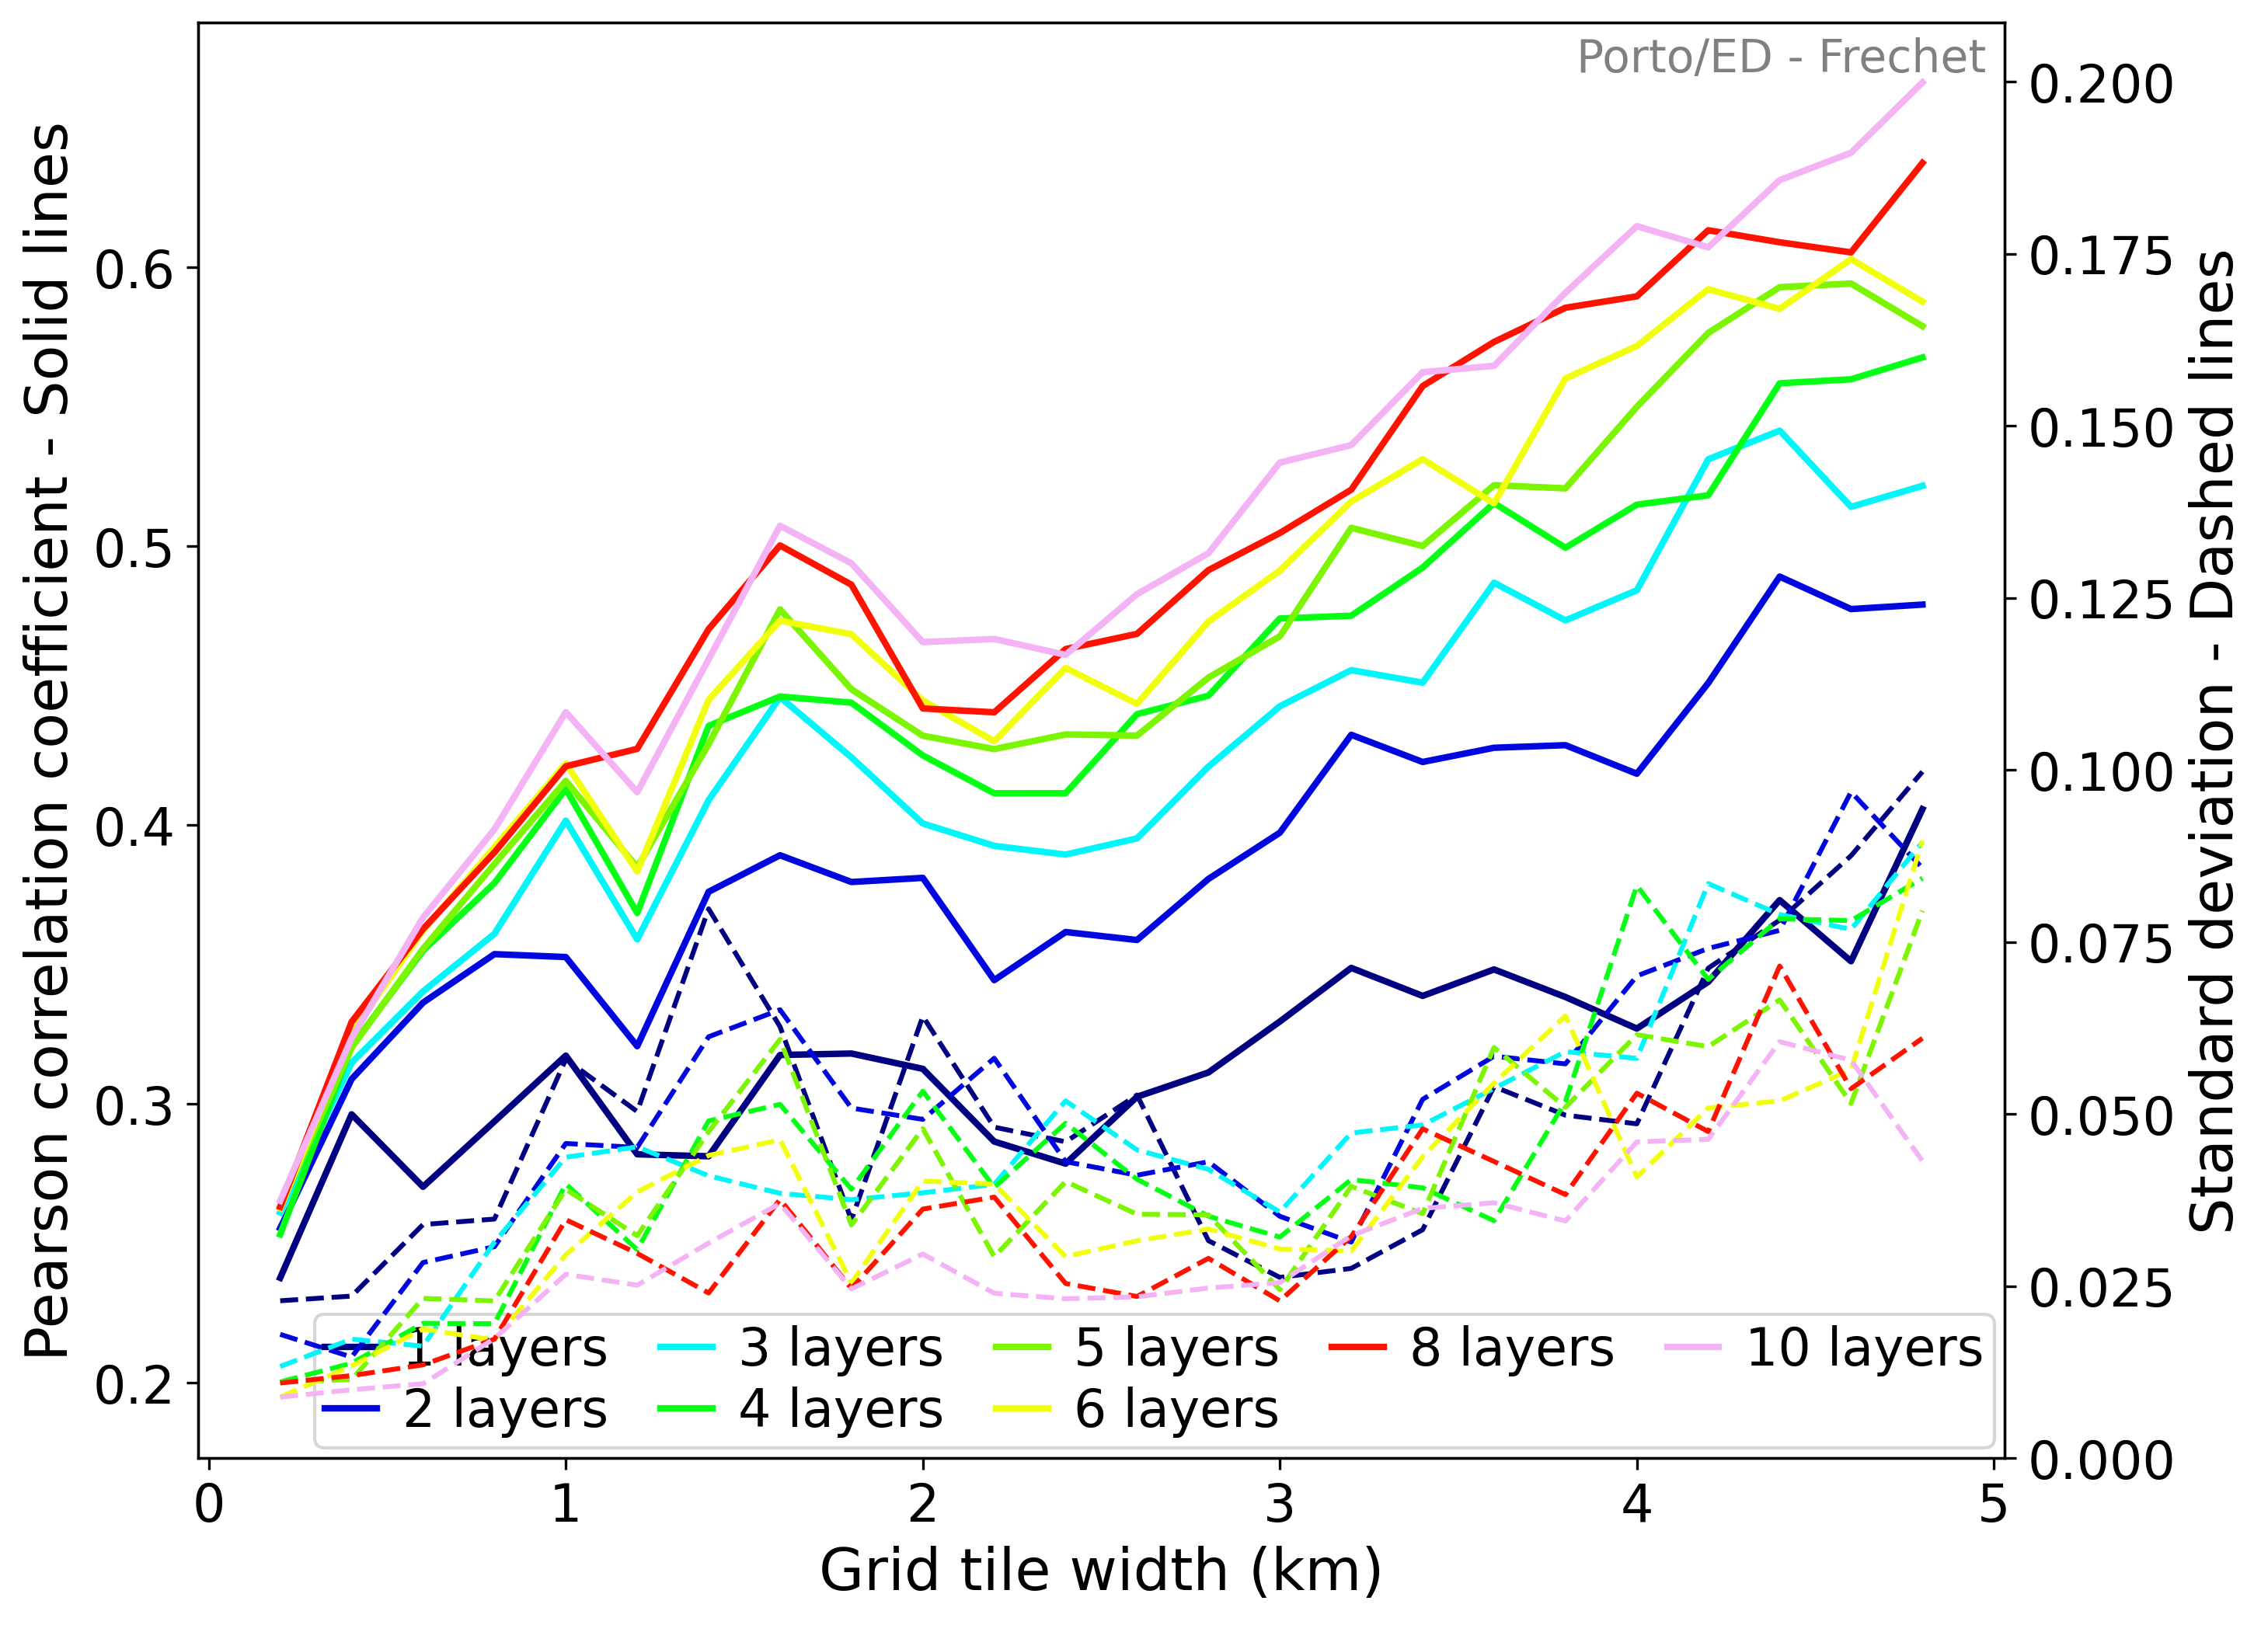

In [ ]:
# Porto/ED - Frechet
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], measure="py_ed", parallell_jobs=20, reference="frechet")

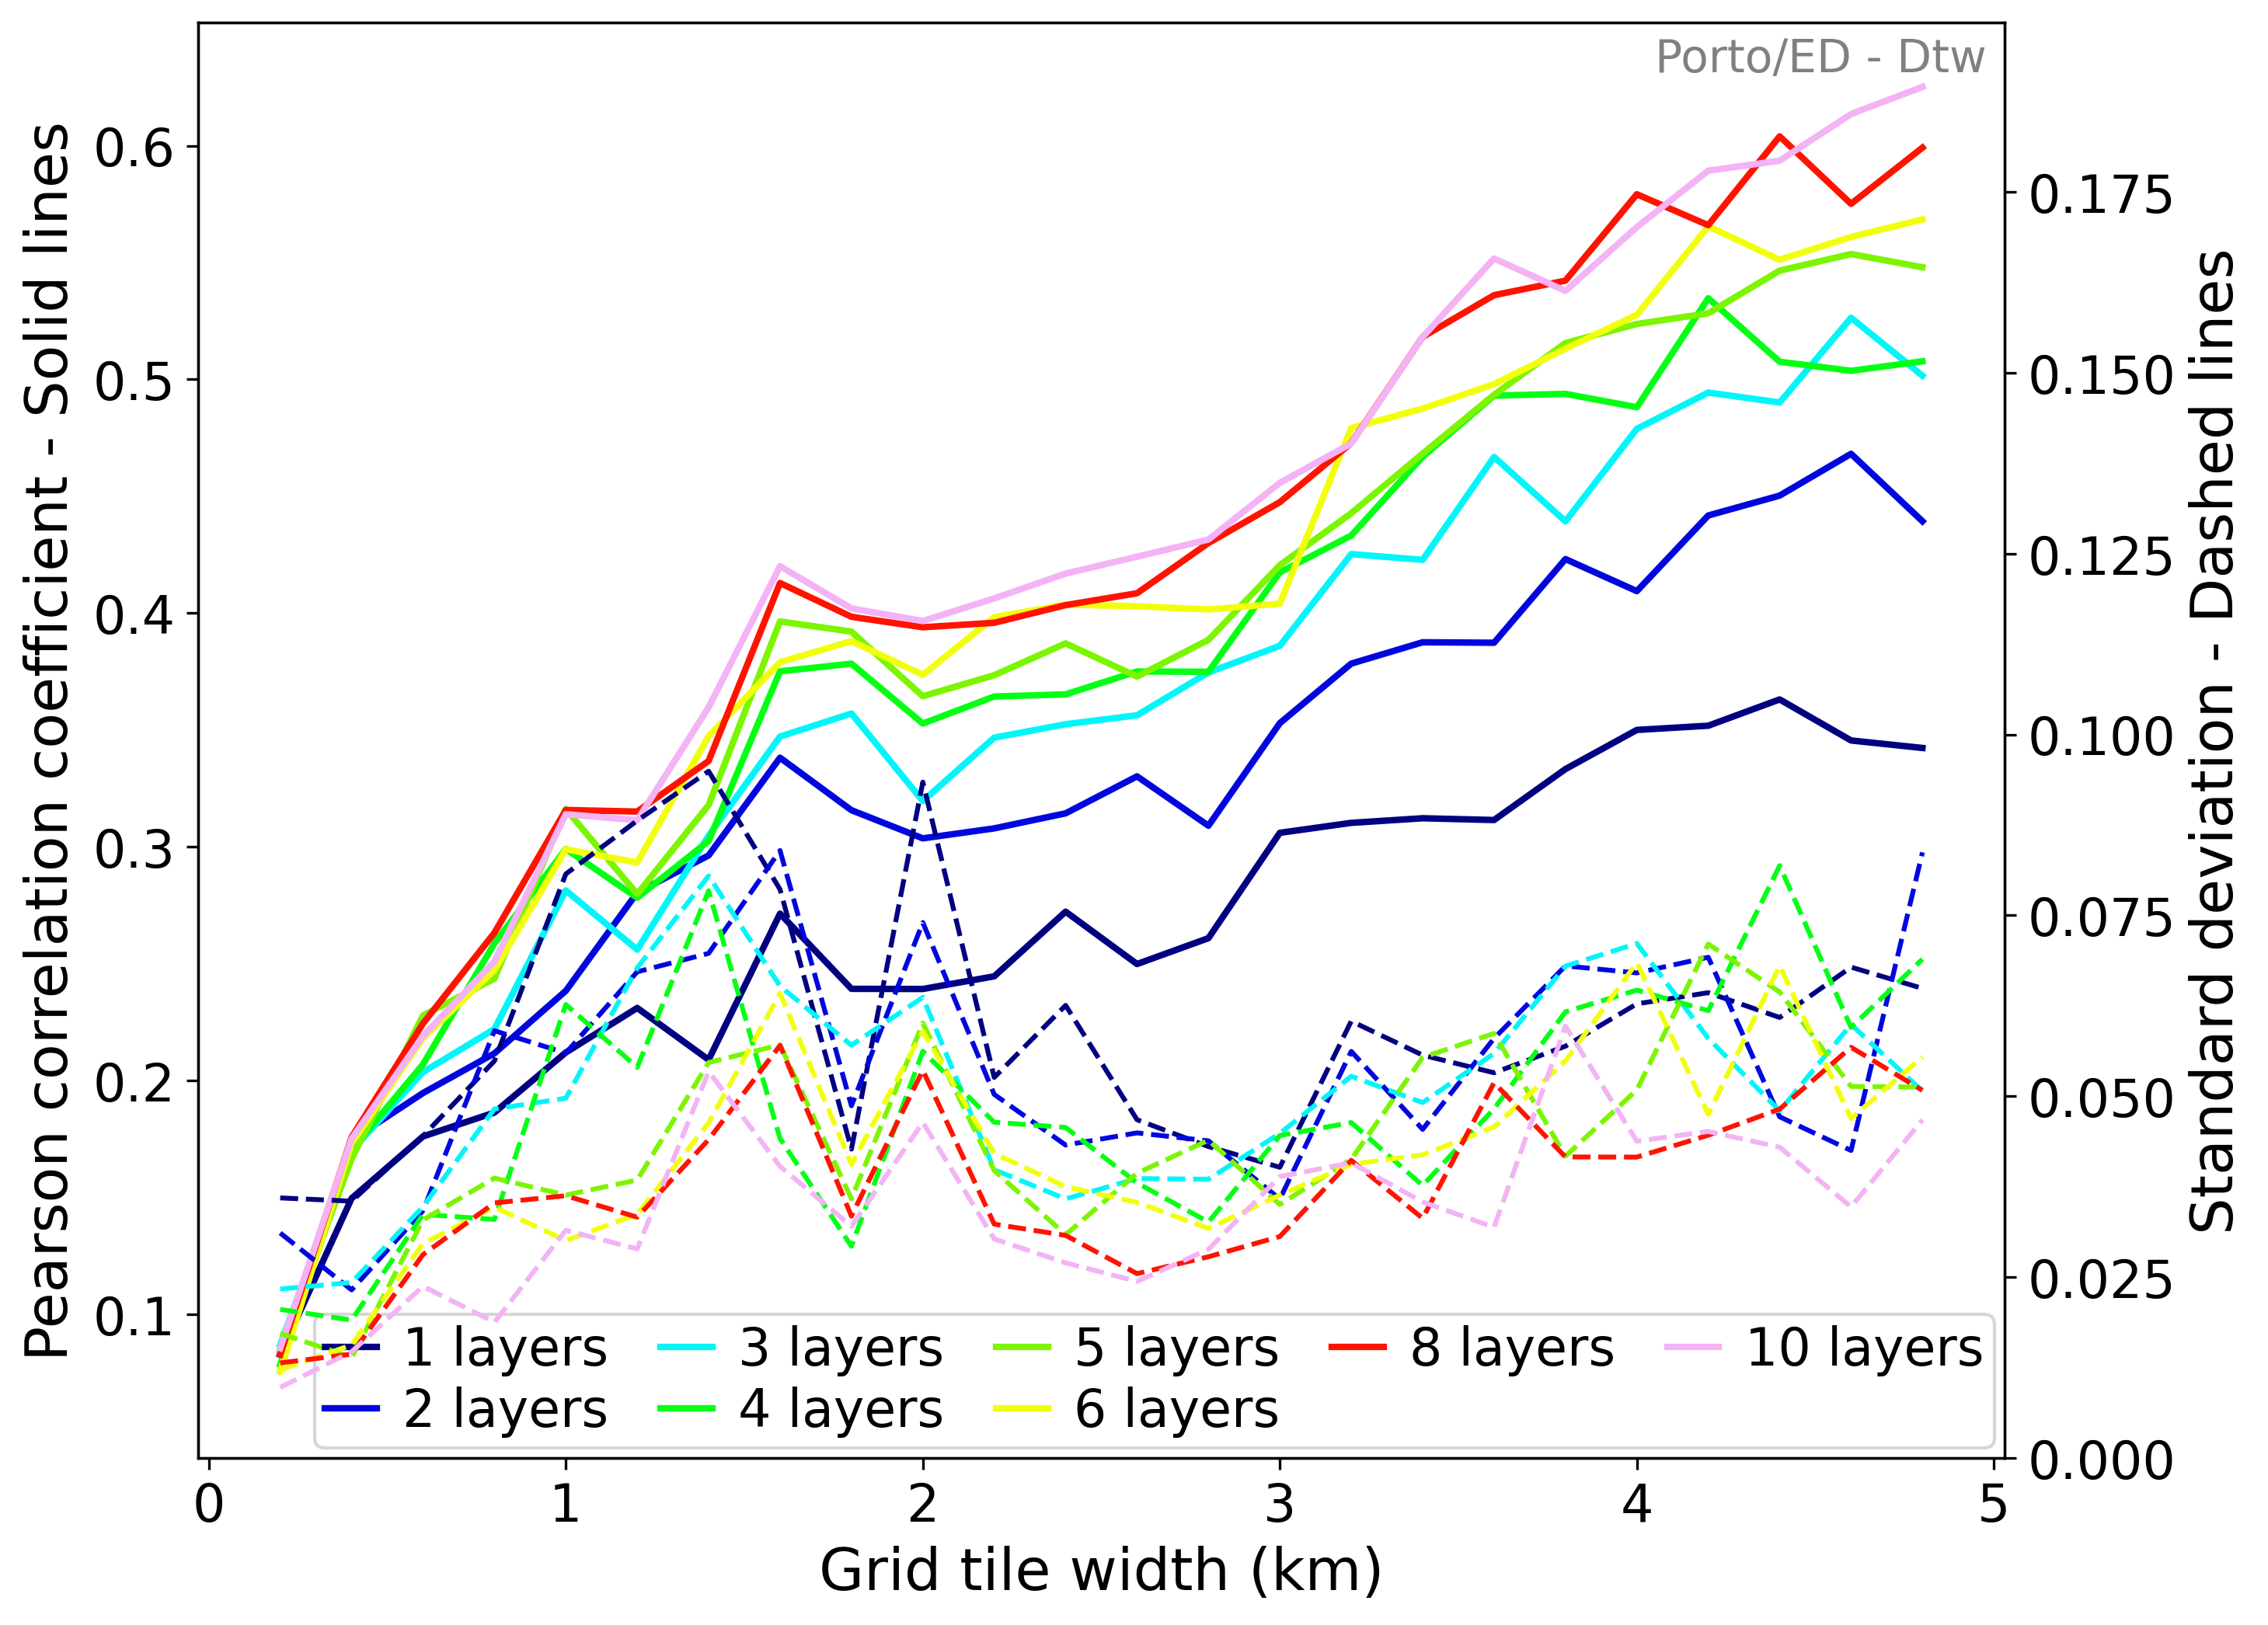

In [ ]:
# Porto/ED - DTW
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], measure="py_ed", parallell_jobs=20, reference="dtw")

# Disk Porto

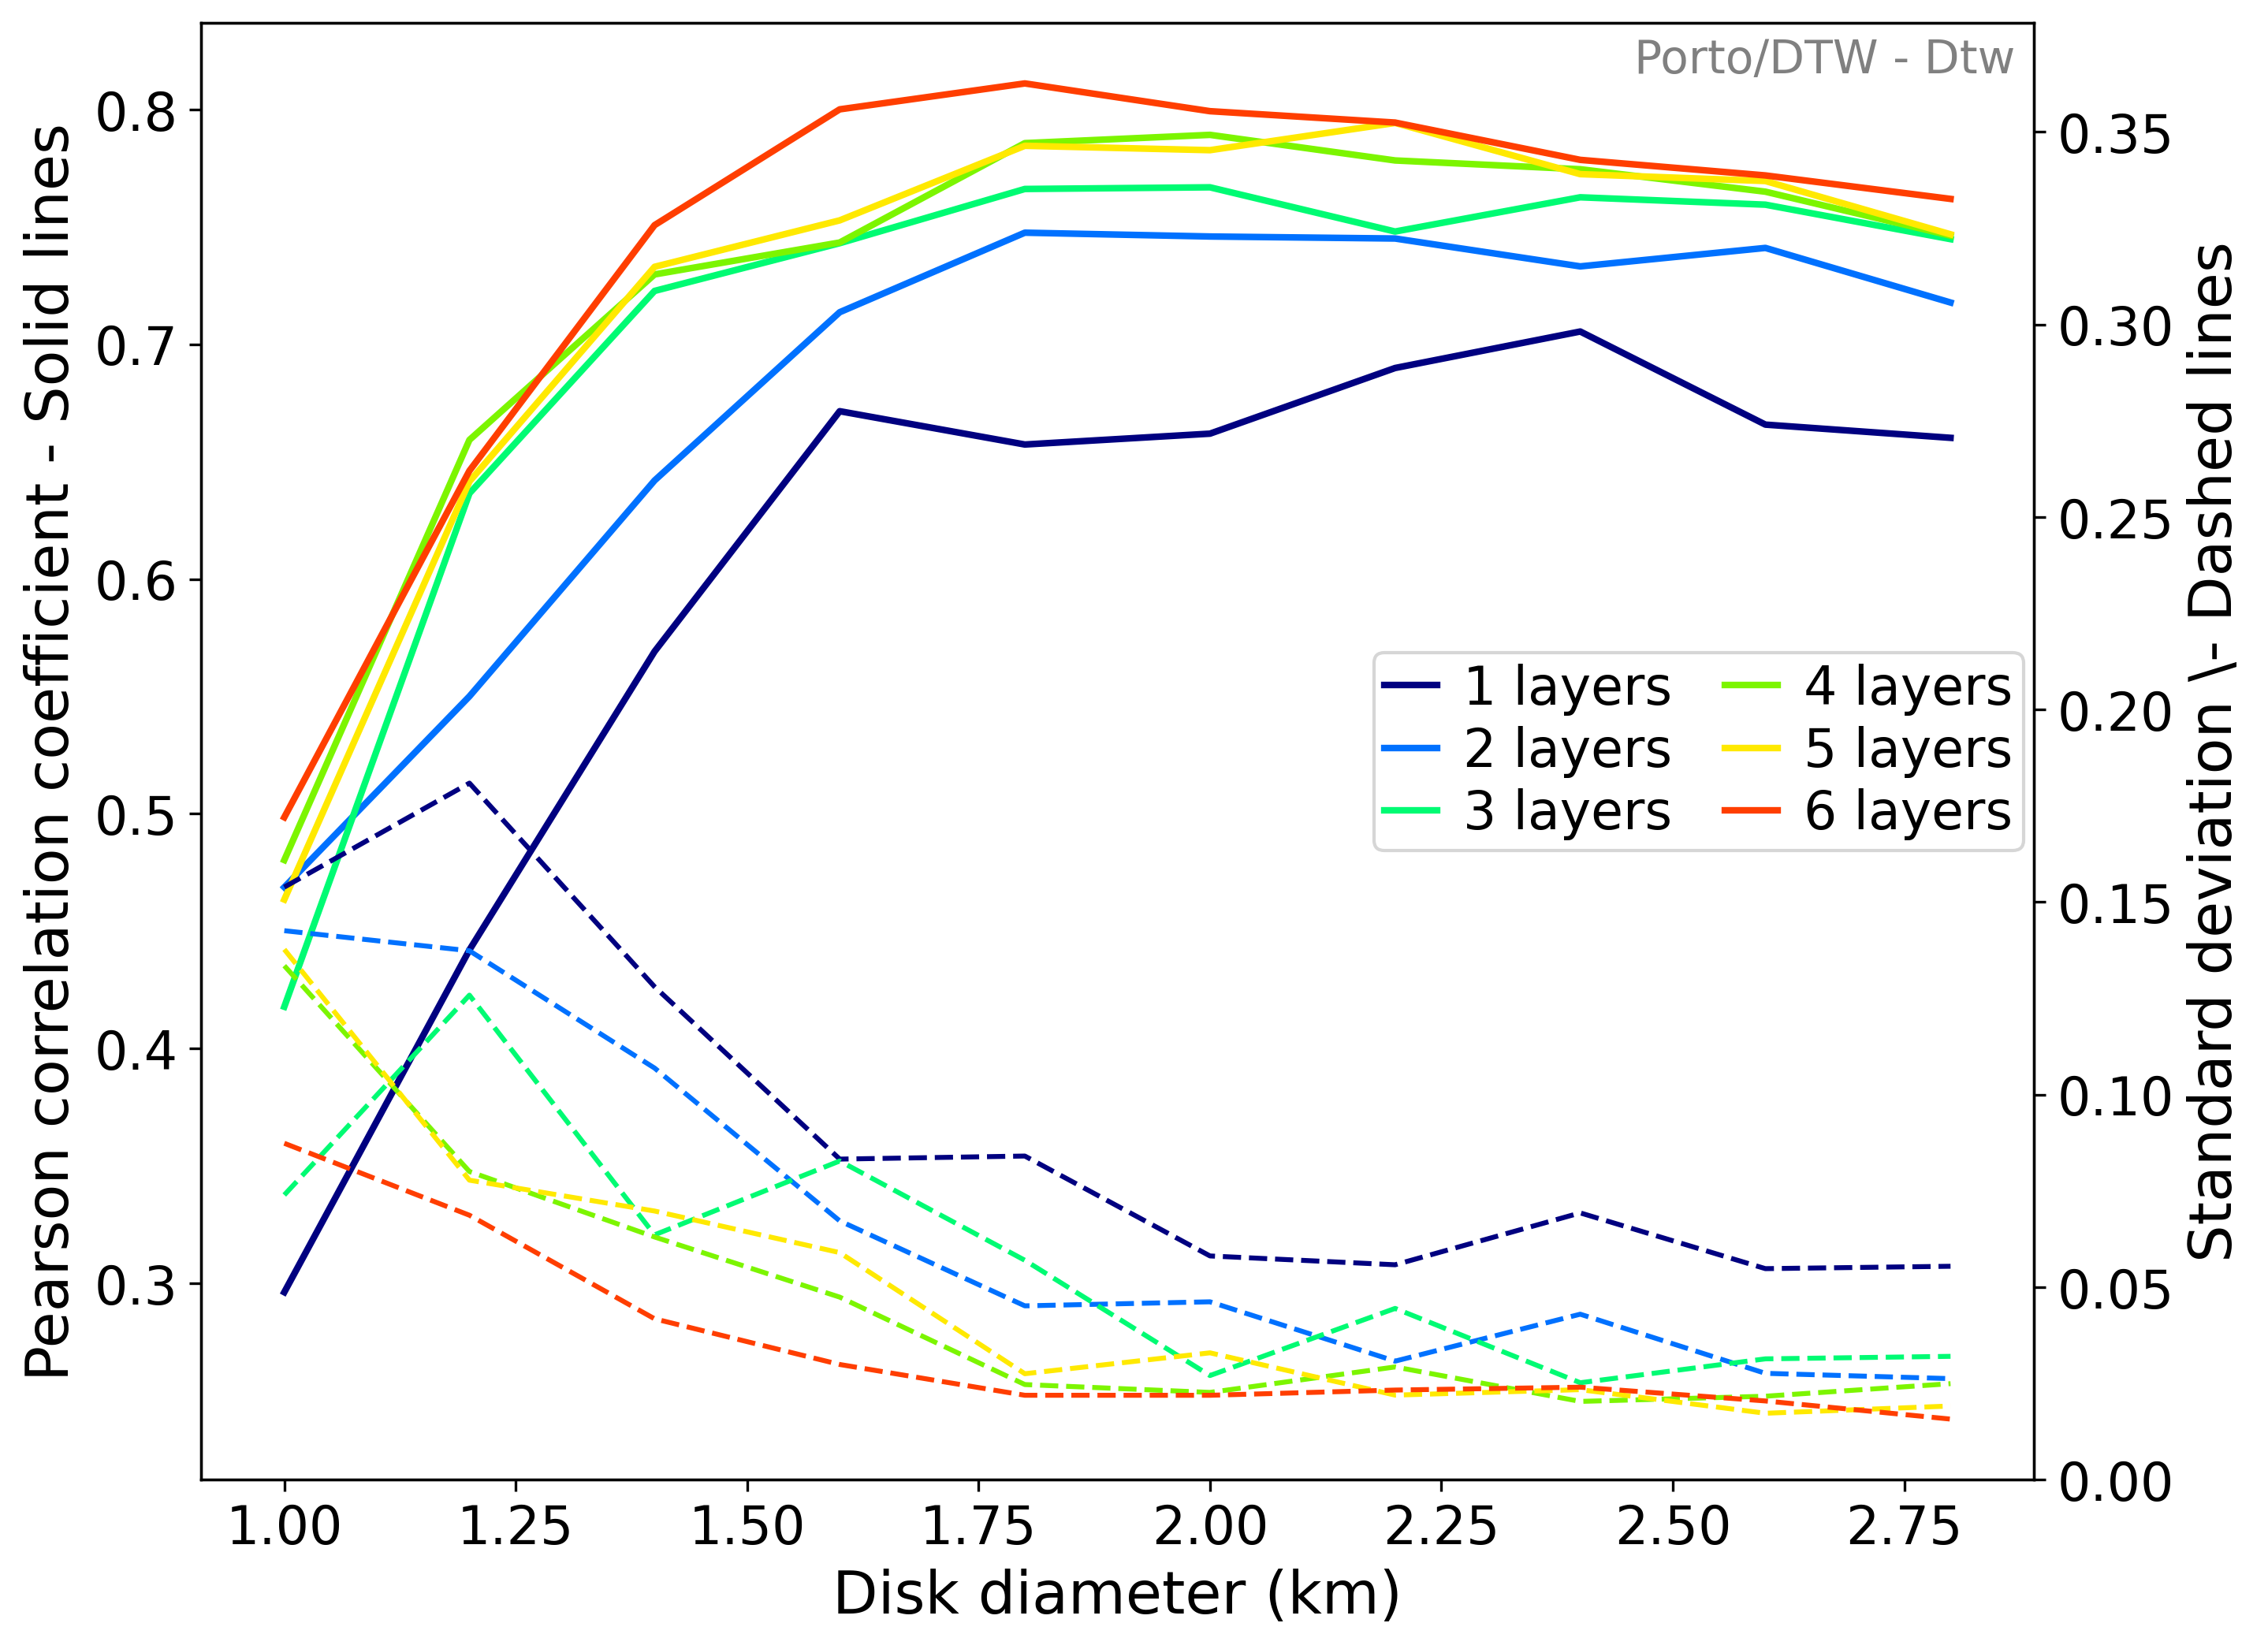

In [ ]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_dtw", reference="dtw", parallell_jobs=20 )

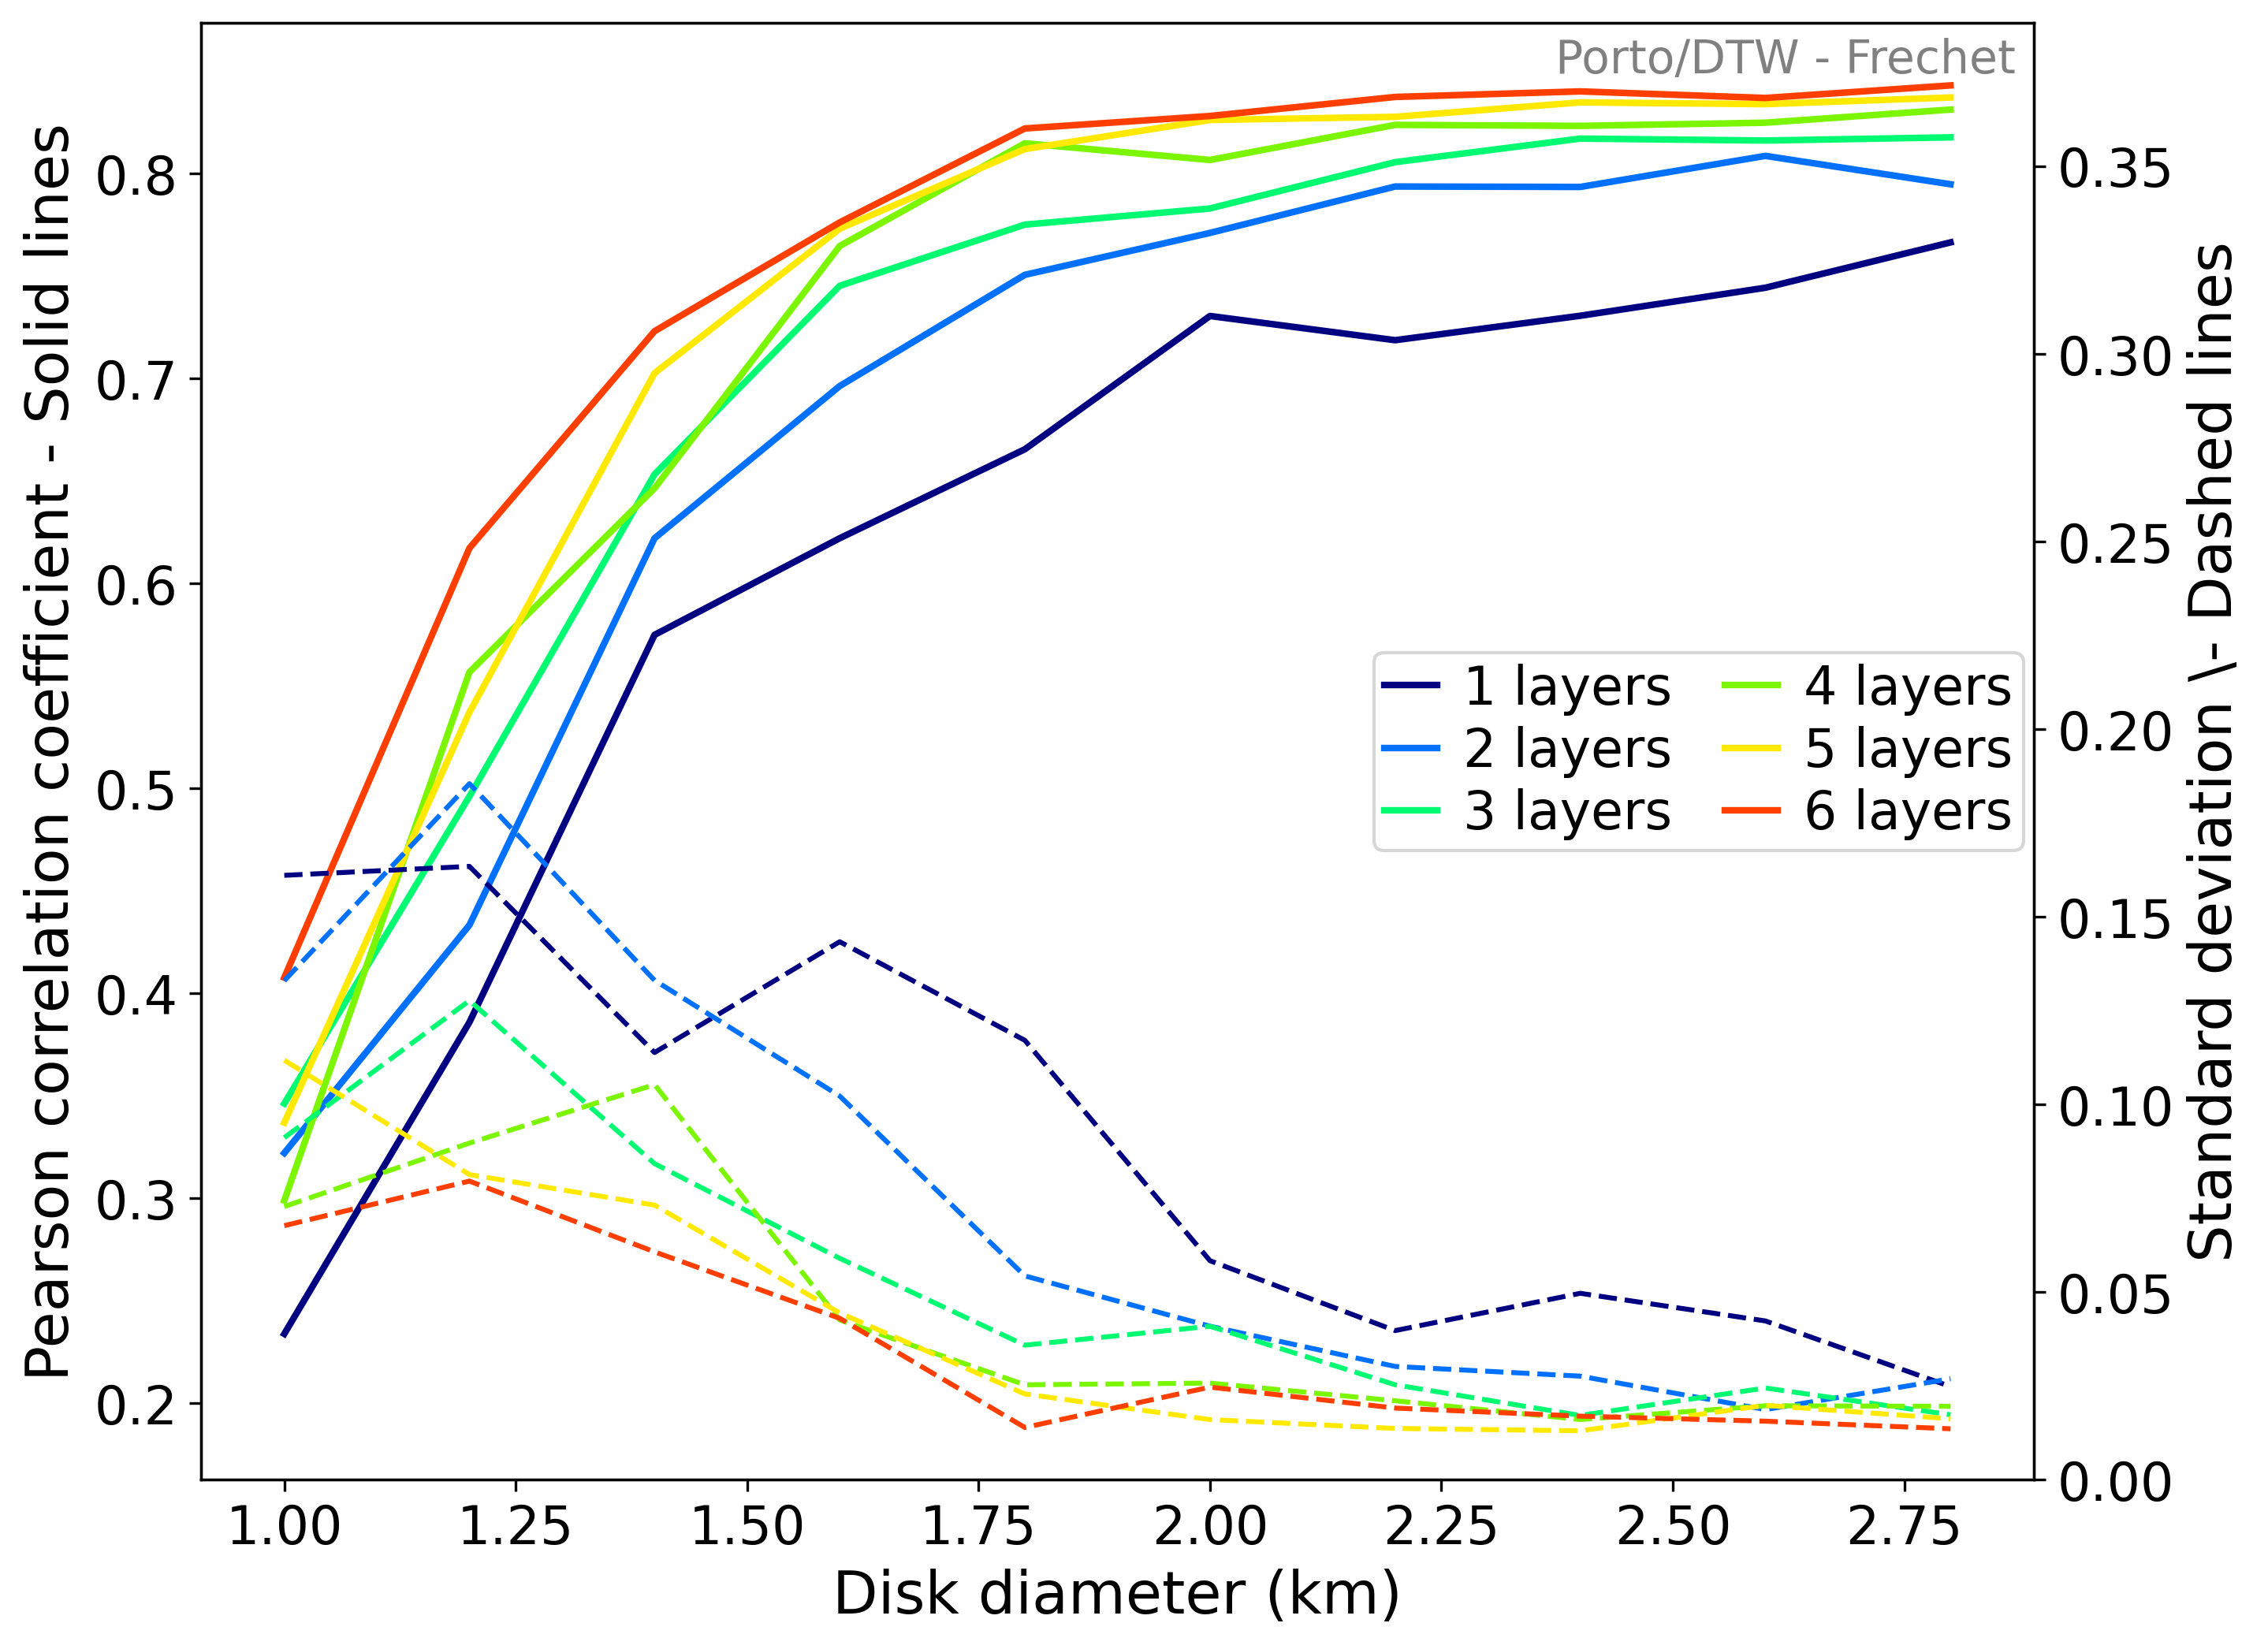

In [ ]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_dtw", reference="frechet", parallell_jobs=20 )

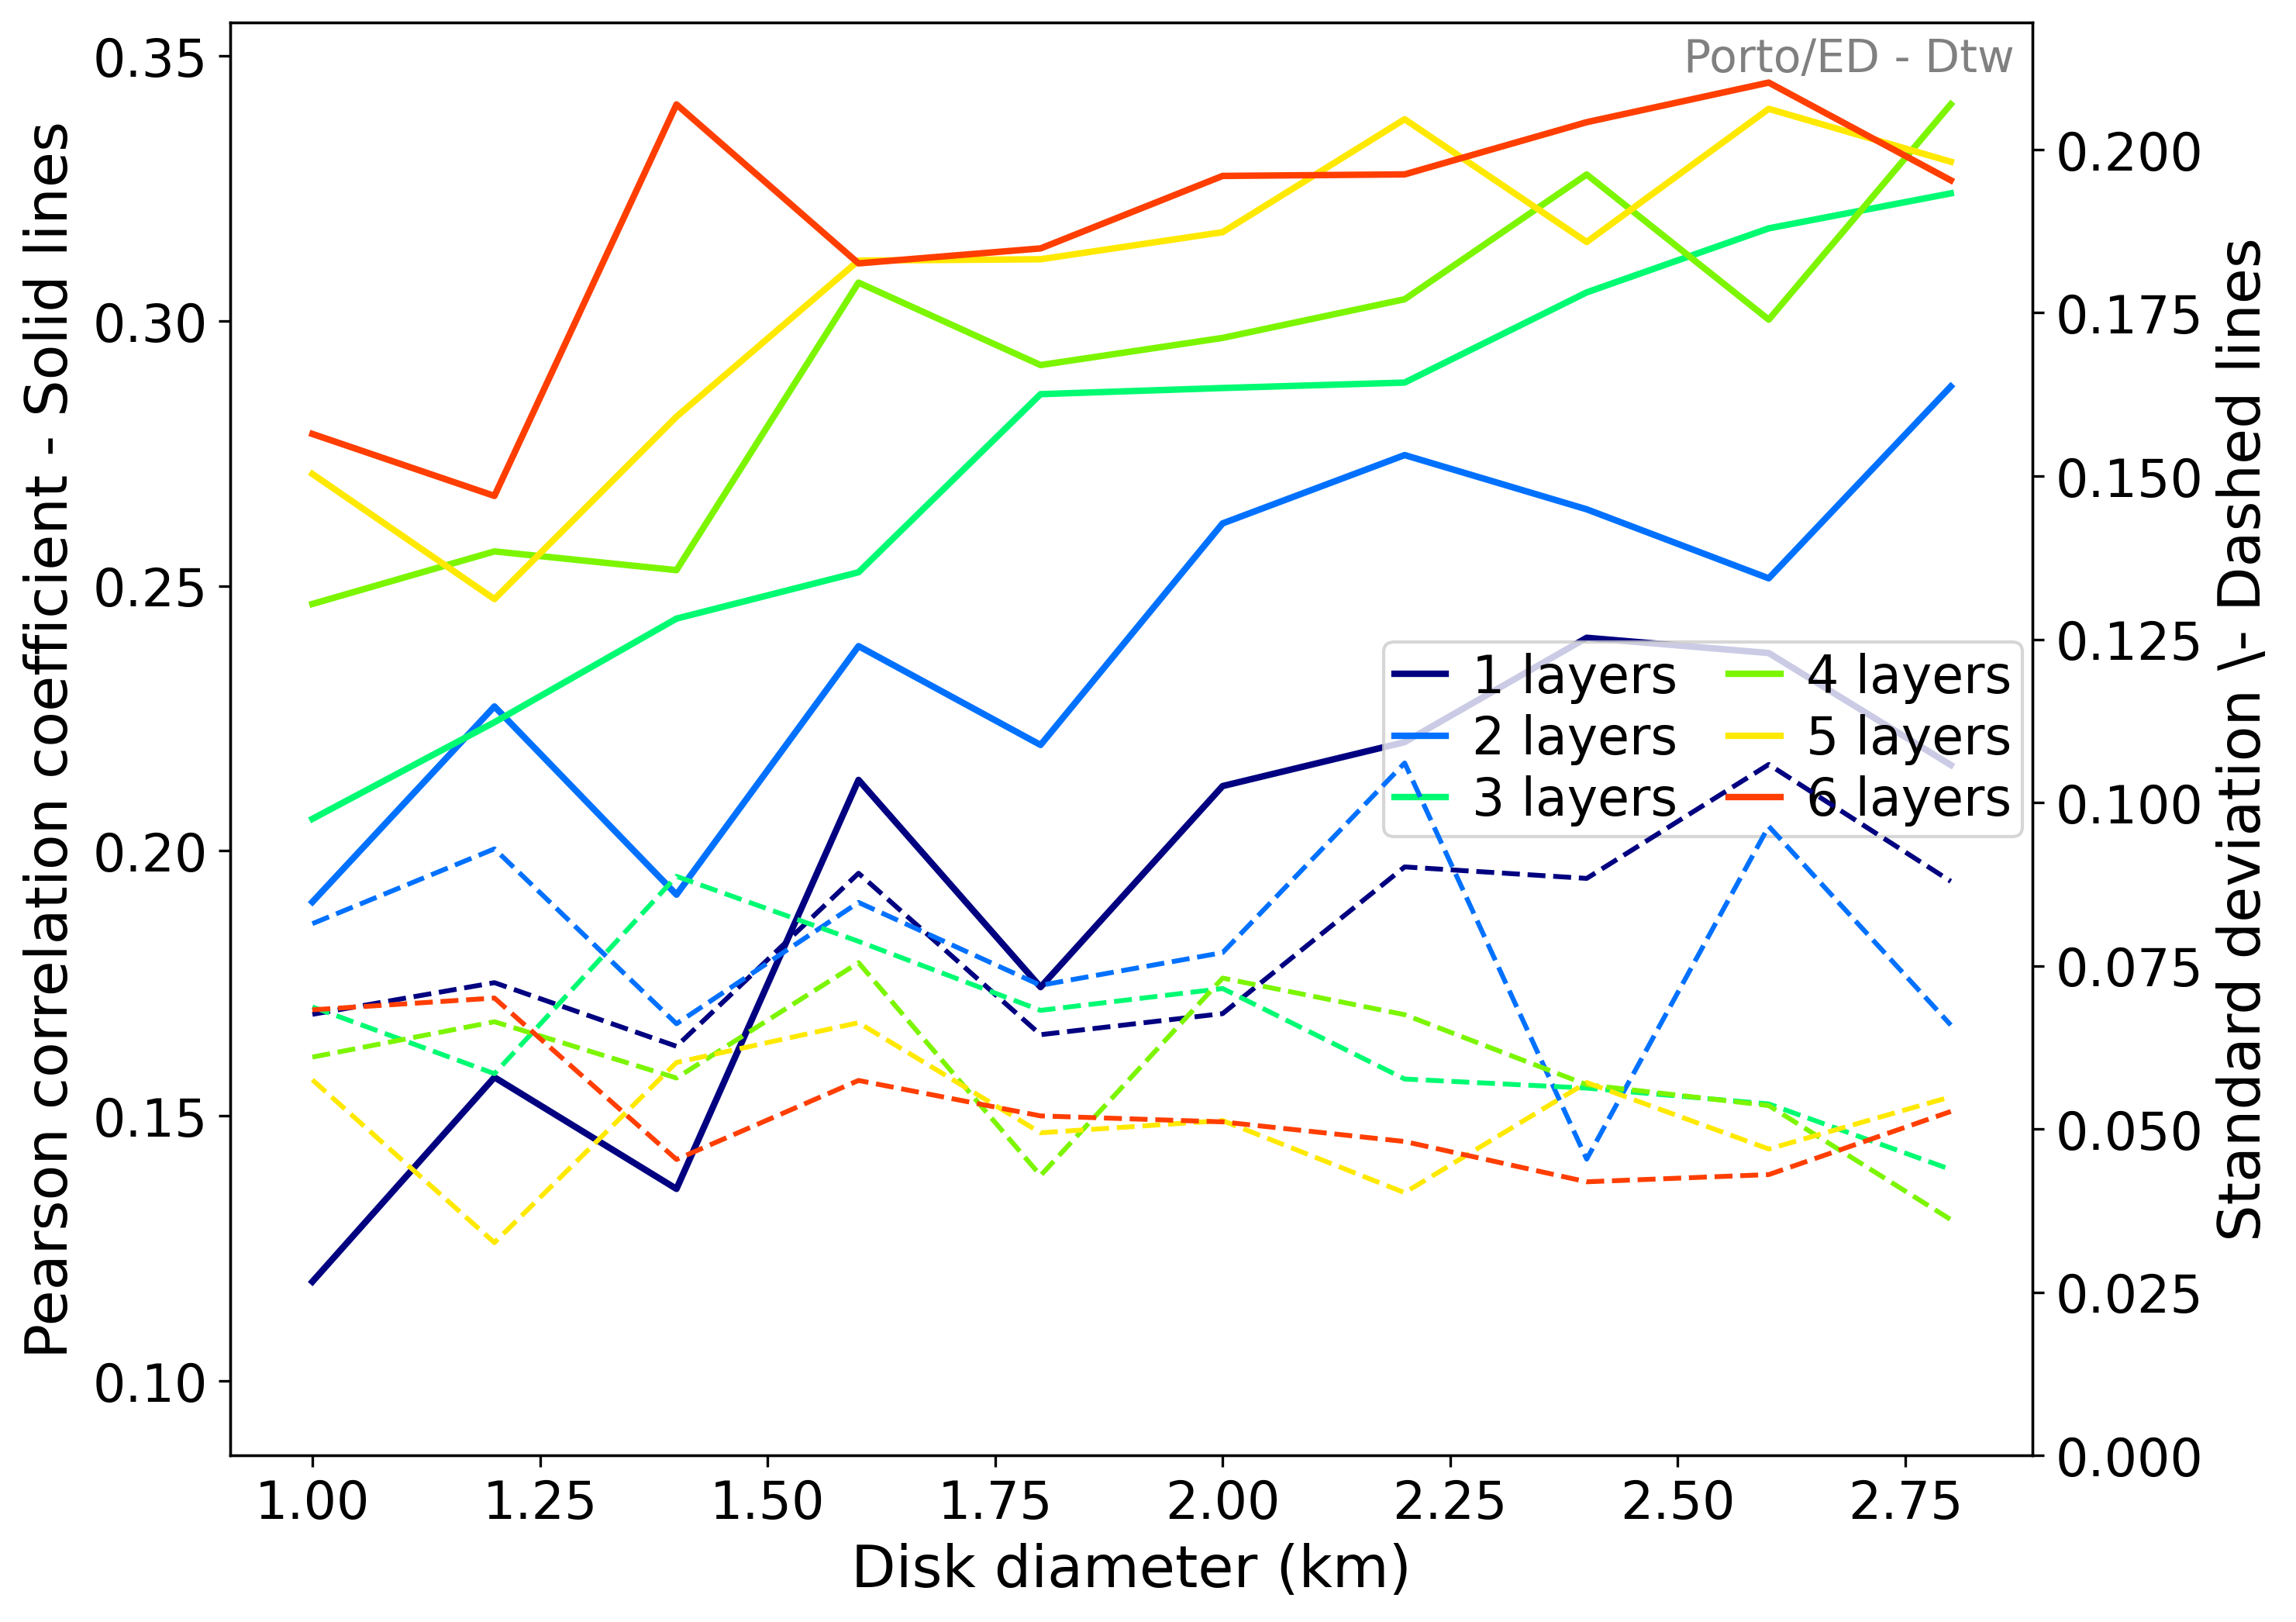

In [ ]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_ed", reference="dtw", parallell_jobs=20 )

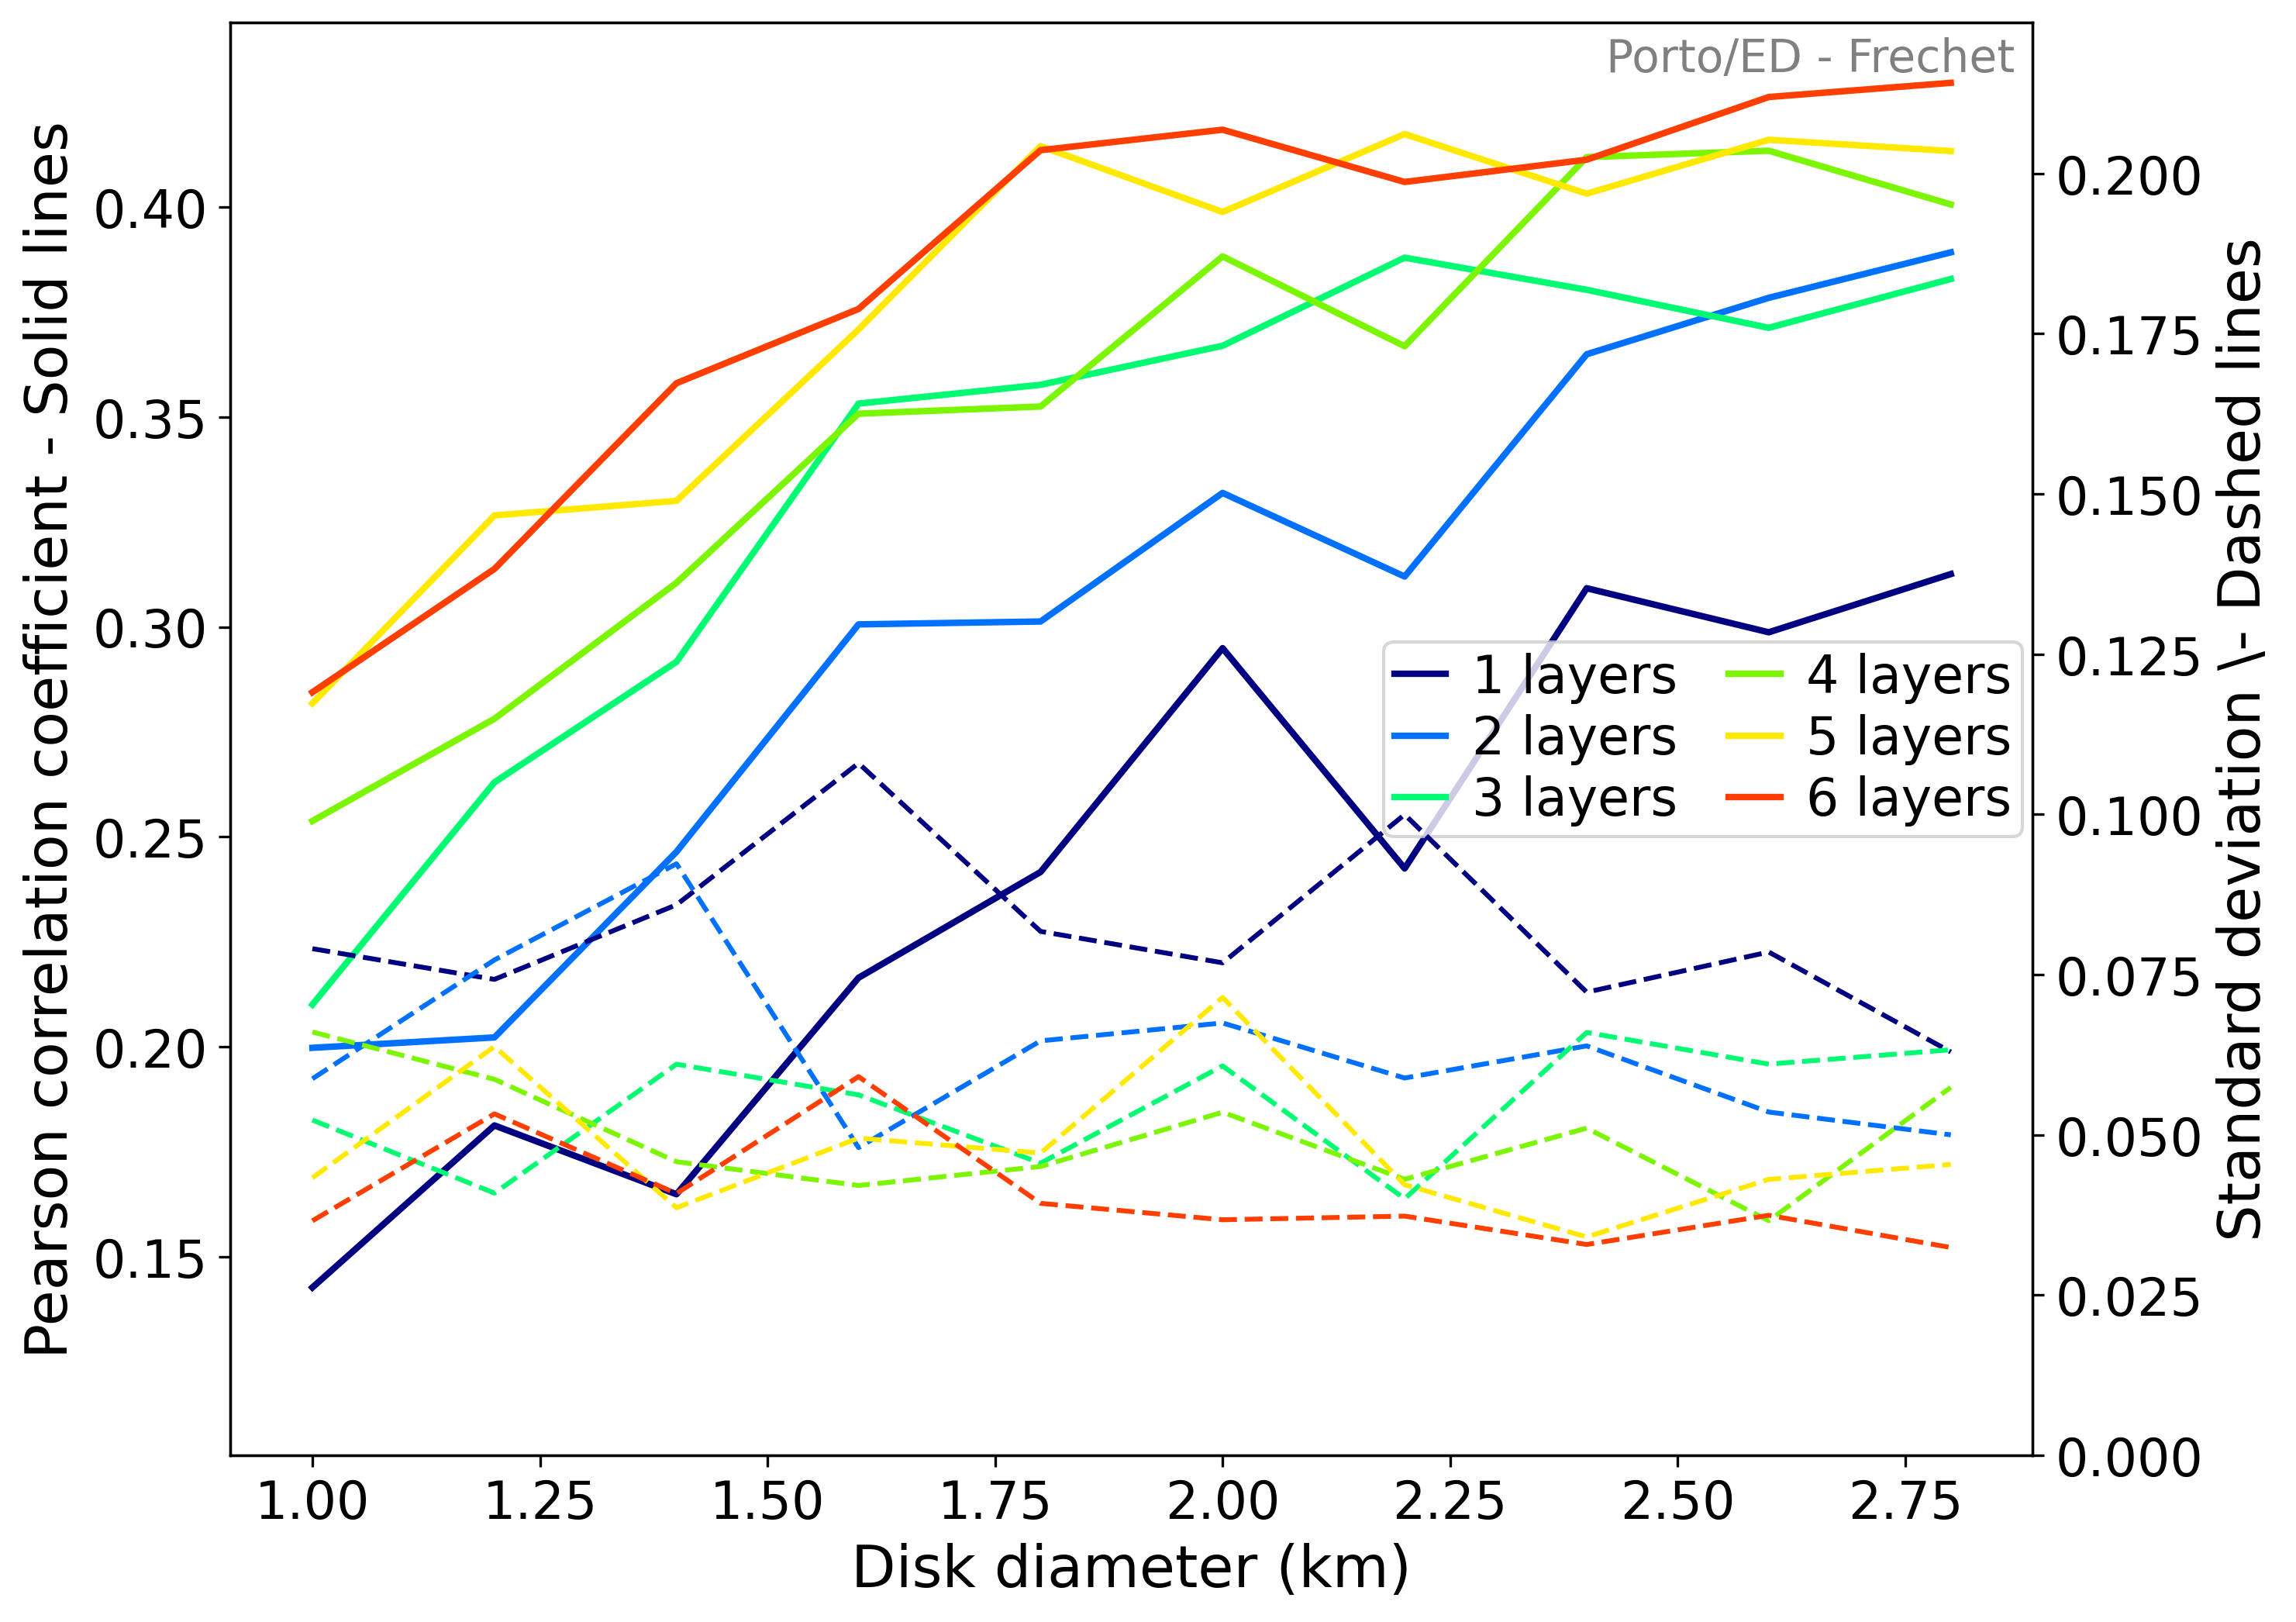

In [ ]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_ed", reference="frechet", parallell_jobs=20 )

# Plotting disk number figure

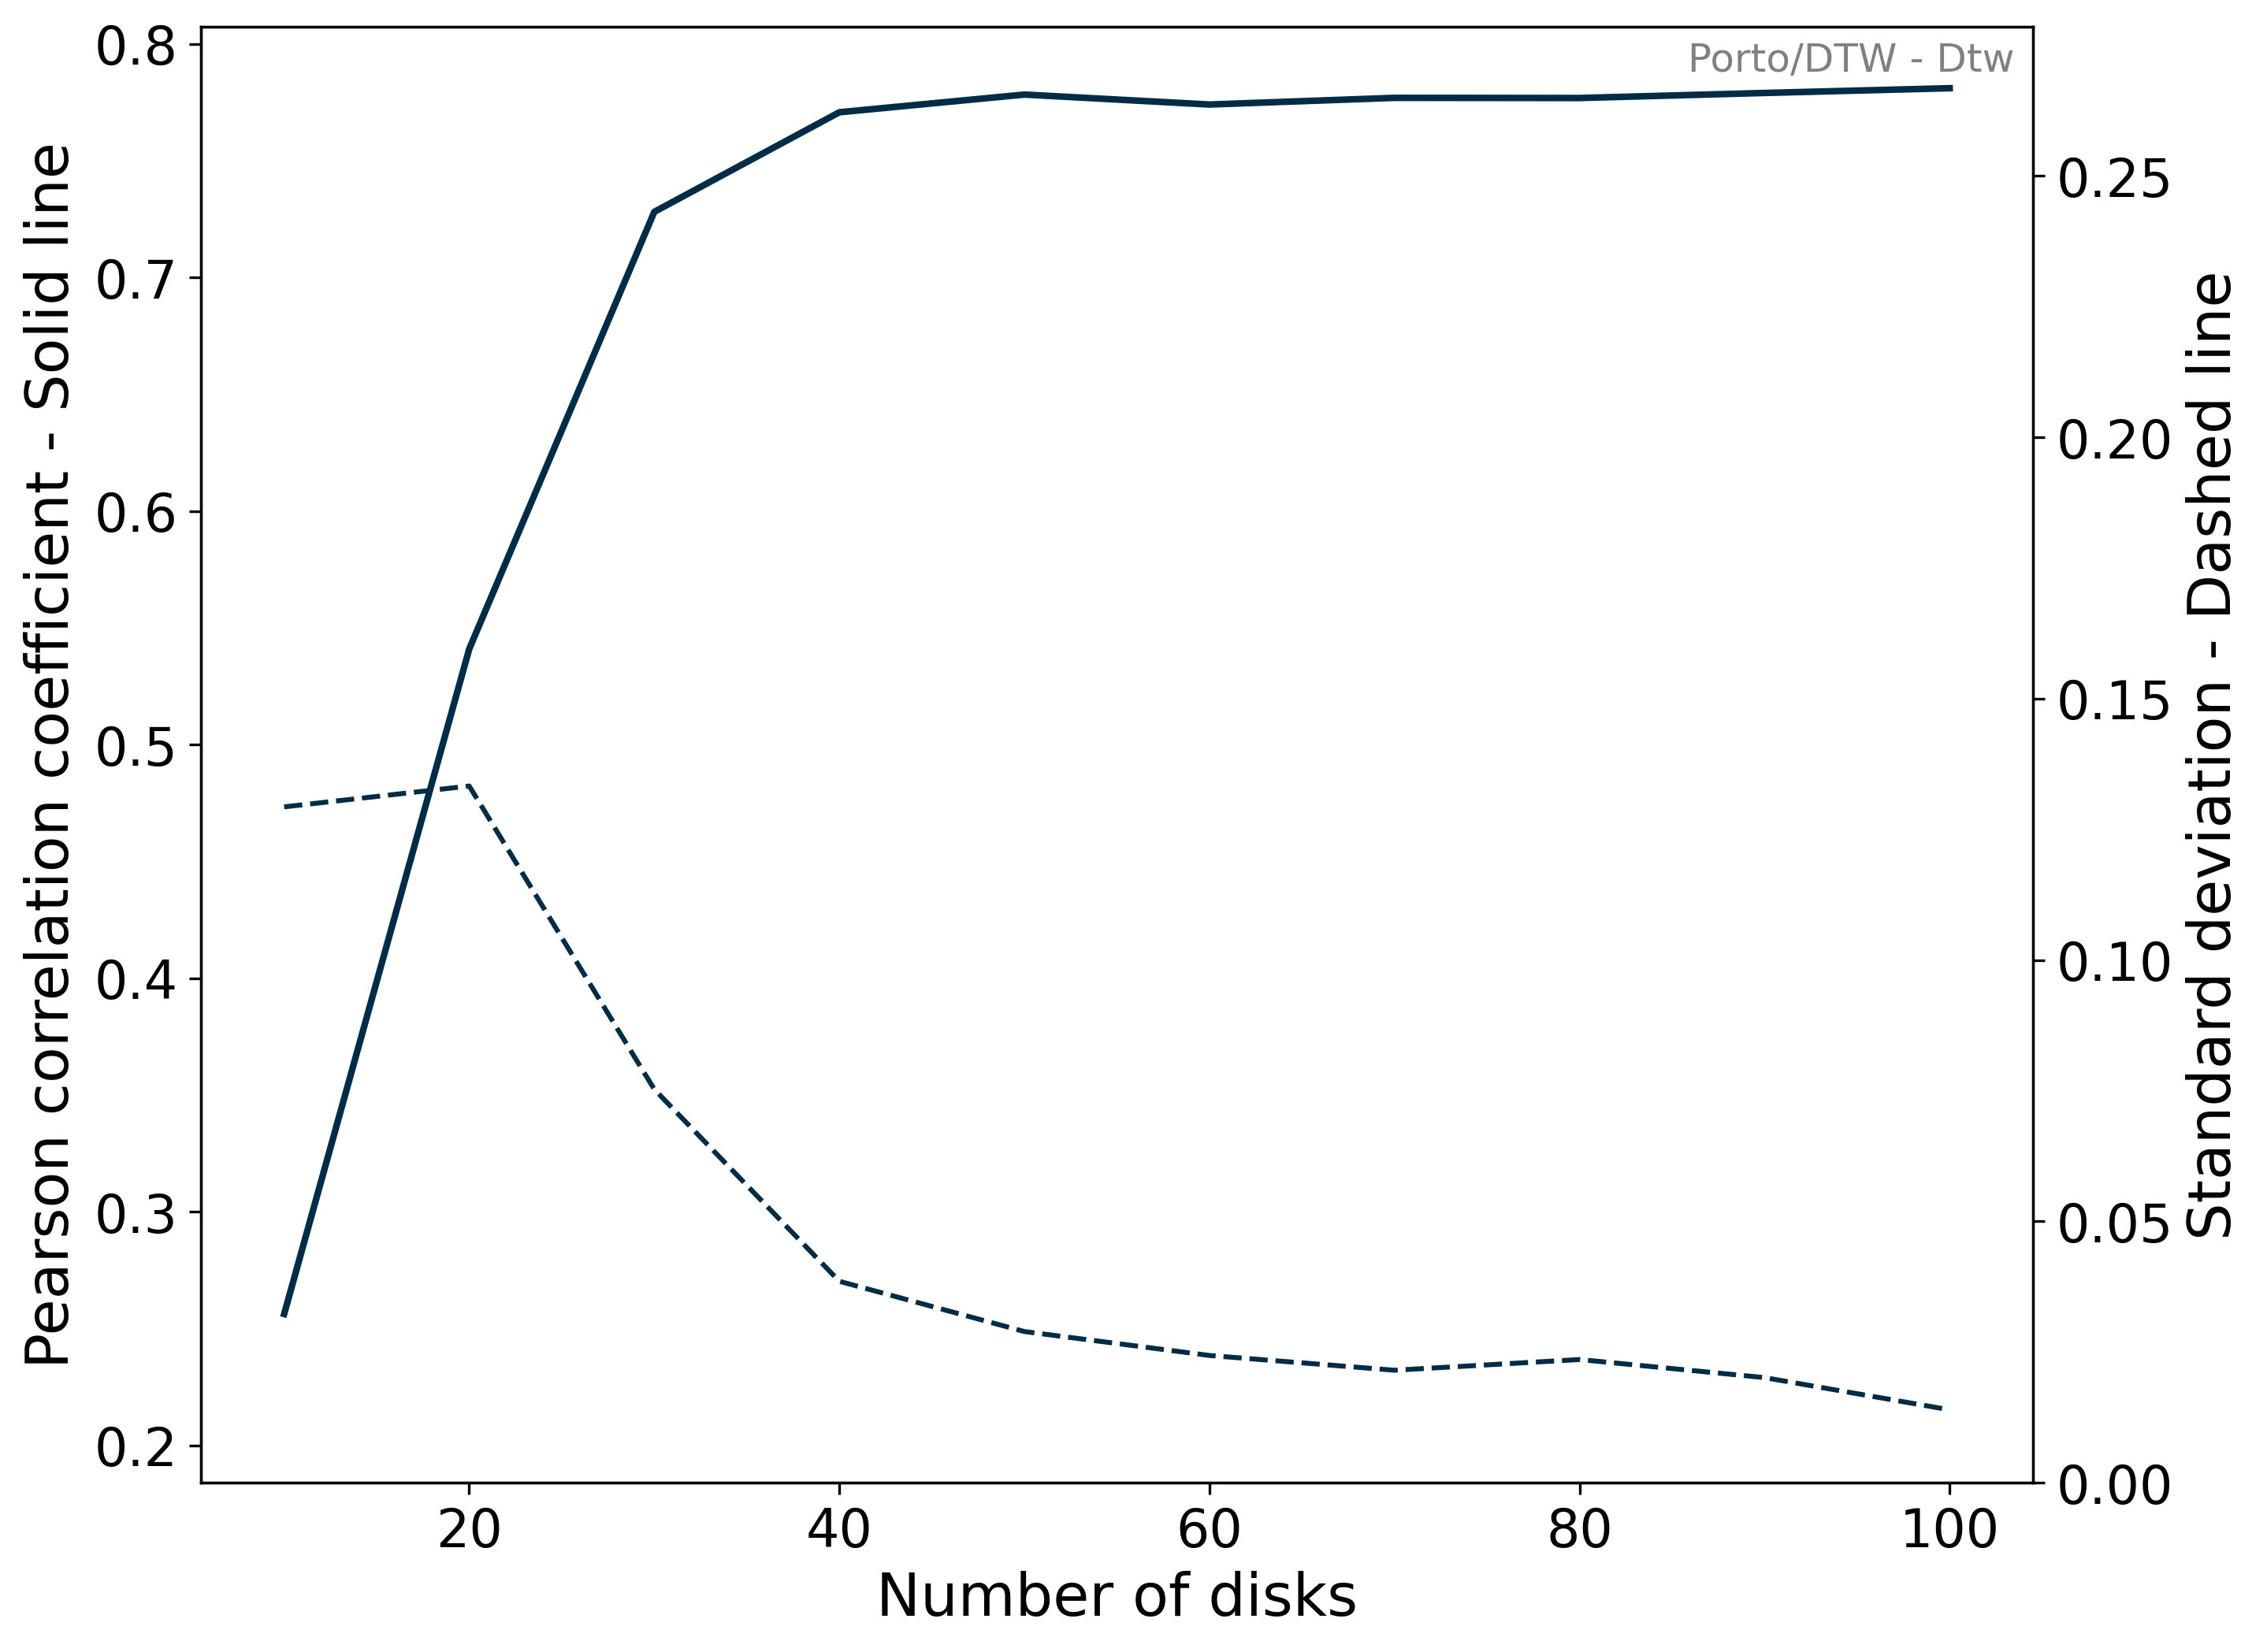

In [ ]:
plot_disk_numbers("porto", 4, 2.2, [10,20,30,40,50,60,70,80,90,100], parallell_jobs=30)

# Computing the hash similarities that will be used for further research

In [ ]:
from experiments.grid_similarity import generate_grid_hash_similarity
from experiments.disk_similarity import generate_disk_hash_similarity
import os

In [ ]:
# Grid Porto
similarities = generate_grid_hash_similarity("porto", 1.6, 5)
output_path = "../code/experiments/similarities/grid_porto.csv"
similarities.to_csv(os.path.abspath(output_path))

In [ ]:
# Disk Porto
similarities = generate_disk_hash_similarity("porto", 2.2, 4, 60)
output_path = "../code/experiments/similarities/disk_porto.csv"
similarities.to_csv(os.path.abspath(output_path))

# Runtimes of grid similarity computations

In [ ]:
from experiments.grid_similarity import measure_grid_hash_similarity_computation_time
from utils.figure_creator import draw_hash_similarity_runtime, draw_hash_similarity_runtime_logarithmic
import pandas as pd
import os
import numpy as np

In [ ]:
# Measuring Grid Porto similarity computation times

runs = 10
data_sets = range(100,1001,100)
output_folder = "../code/experiments/timing/"
file_name = "similarity_runtimes_grid_porto.csv"

df = pd.DataFrame( index=[f"run_{x+1}" for x in range(runs)], columns=[x for x in data_sets])

for size in data_sets:
    print(f"Computing size {size}", end="\r")
    execution_times = measure_grid_hash_similarity_computation_time("porto", size, 1.6, 5, "dtw", parallell_jobs=10)
    df[size] = execution_times

df.to_csv(os.path.join(output_folder, file_name))
df

100       200        300        400        500        600   \
run_1   1.250000  6.234375  12.750000  25.171875  35.187500  50.671875   
run_2   1.437500  5.656250  12.390625  24.859375  35.578125  50.500000   
run_3   1.343750  5.953125  12.984375  25.578125  34.906250  50.125000   
run_4   1.328125  5.734375  12.250000  25.531250  34.656250  49.656250   
run_5   1.375000  6.125000  12.765625  24.968750  35.234375  51.234375   
run_6   1.531250  5.609375  13.125000  24.859375  34.968750  50.250000   
run_7   1.562500  5.843750  12.421875  25.343750  33.921875  50.937500   
run_8   1.406250  4.703125  12.656250  25.687500  35.531250  49.734375   
run_9   1.515625  5.828125  13.015625  24.656250  35.359375  50.468750   
run_10  1.406250  5.593750  13.281250  25.296875  34.062500  50.875000   

             700        800         900         1000  
run_1   75.359375  94.609375  112.484375  155.453125  
run_2   75.000000  94.625000  111.937500  155.140625  
run_3   76.265625  93.890625  114.359375  157.484375  
run_4   74.984375  94.031250  112.562500  155.125000  
run_5   76.281250  93.156250  113.171875  157.984375  
run_6   73.984375  93.609375  112.171875  155.718750  
run_7   76.531250  94.671875  113.640625  156.281250  
run_8   75.125000  93.234375  112.390625  156.765625  
run_9   75.328125  92.687500  111.515625  156.062500  
run_10  76.593750  94.468750  113.640625  156.453125

[100 200 300 400 500 600 700]


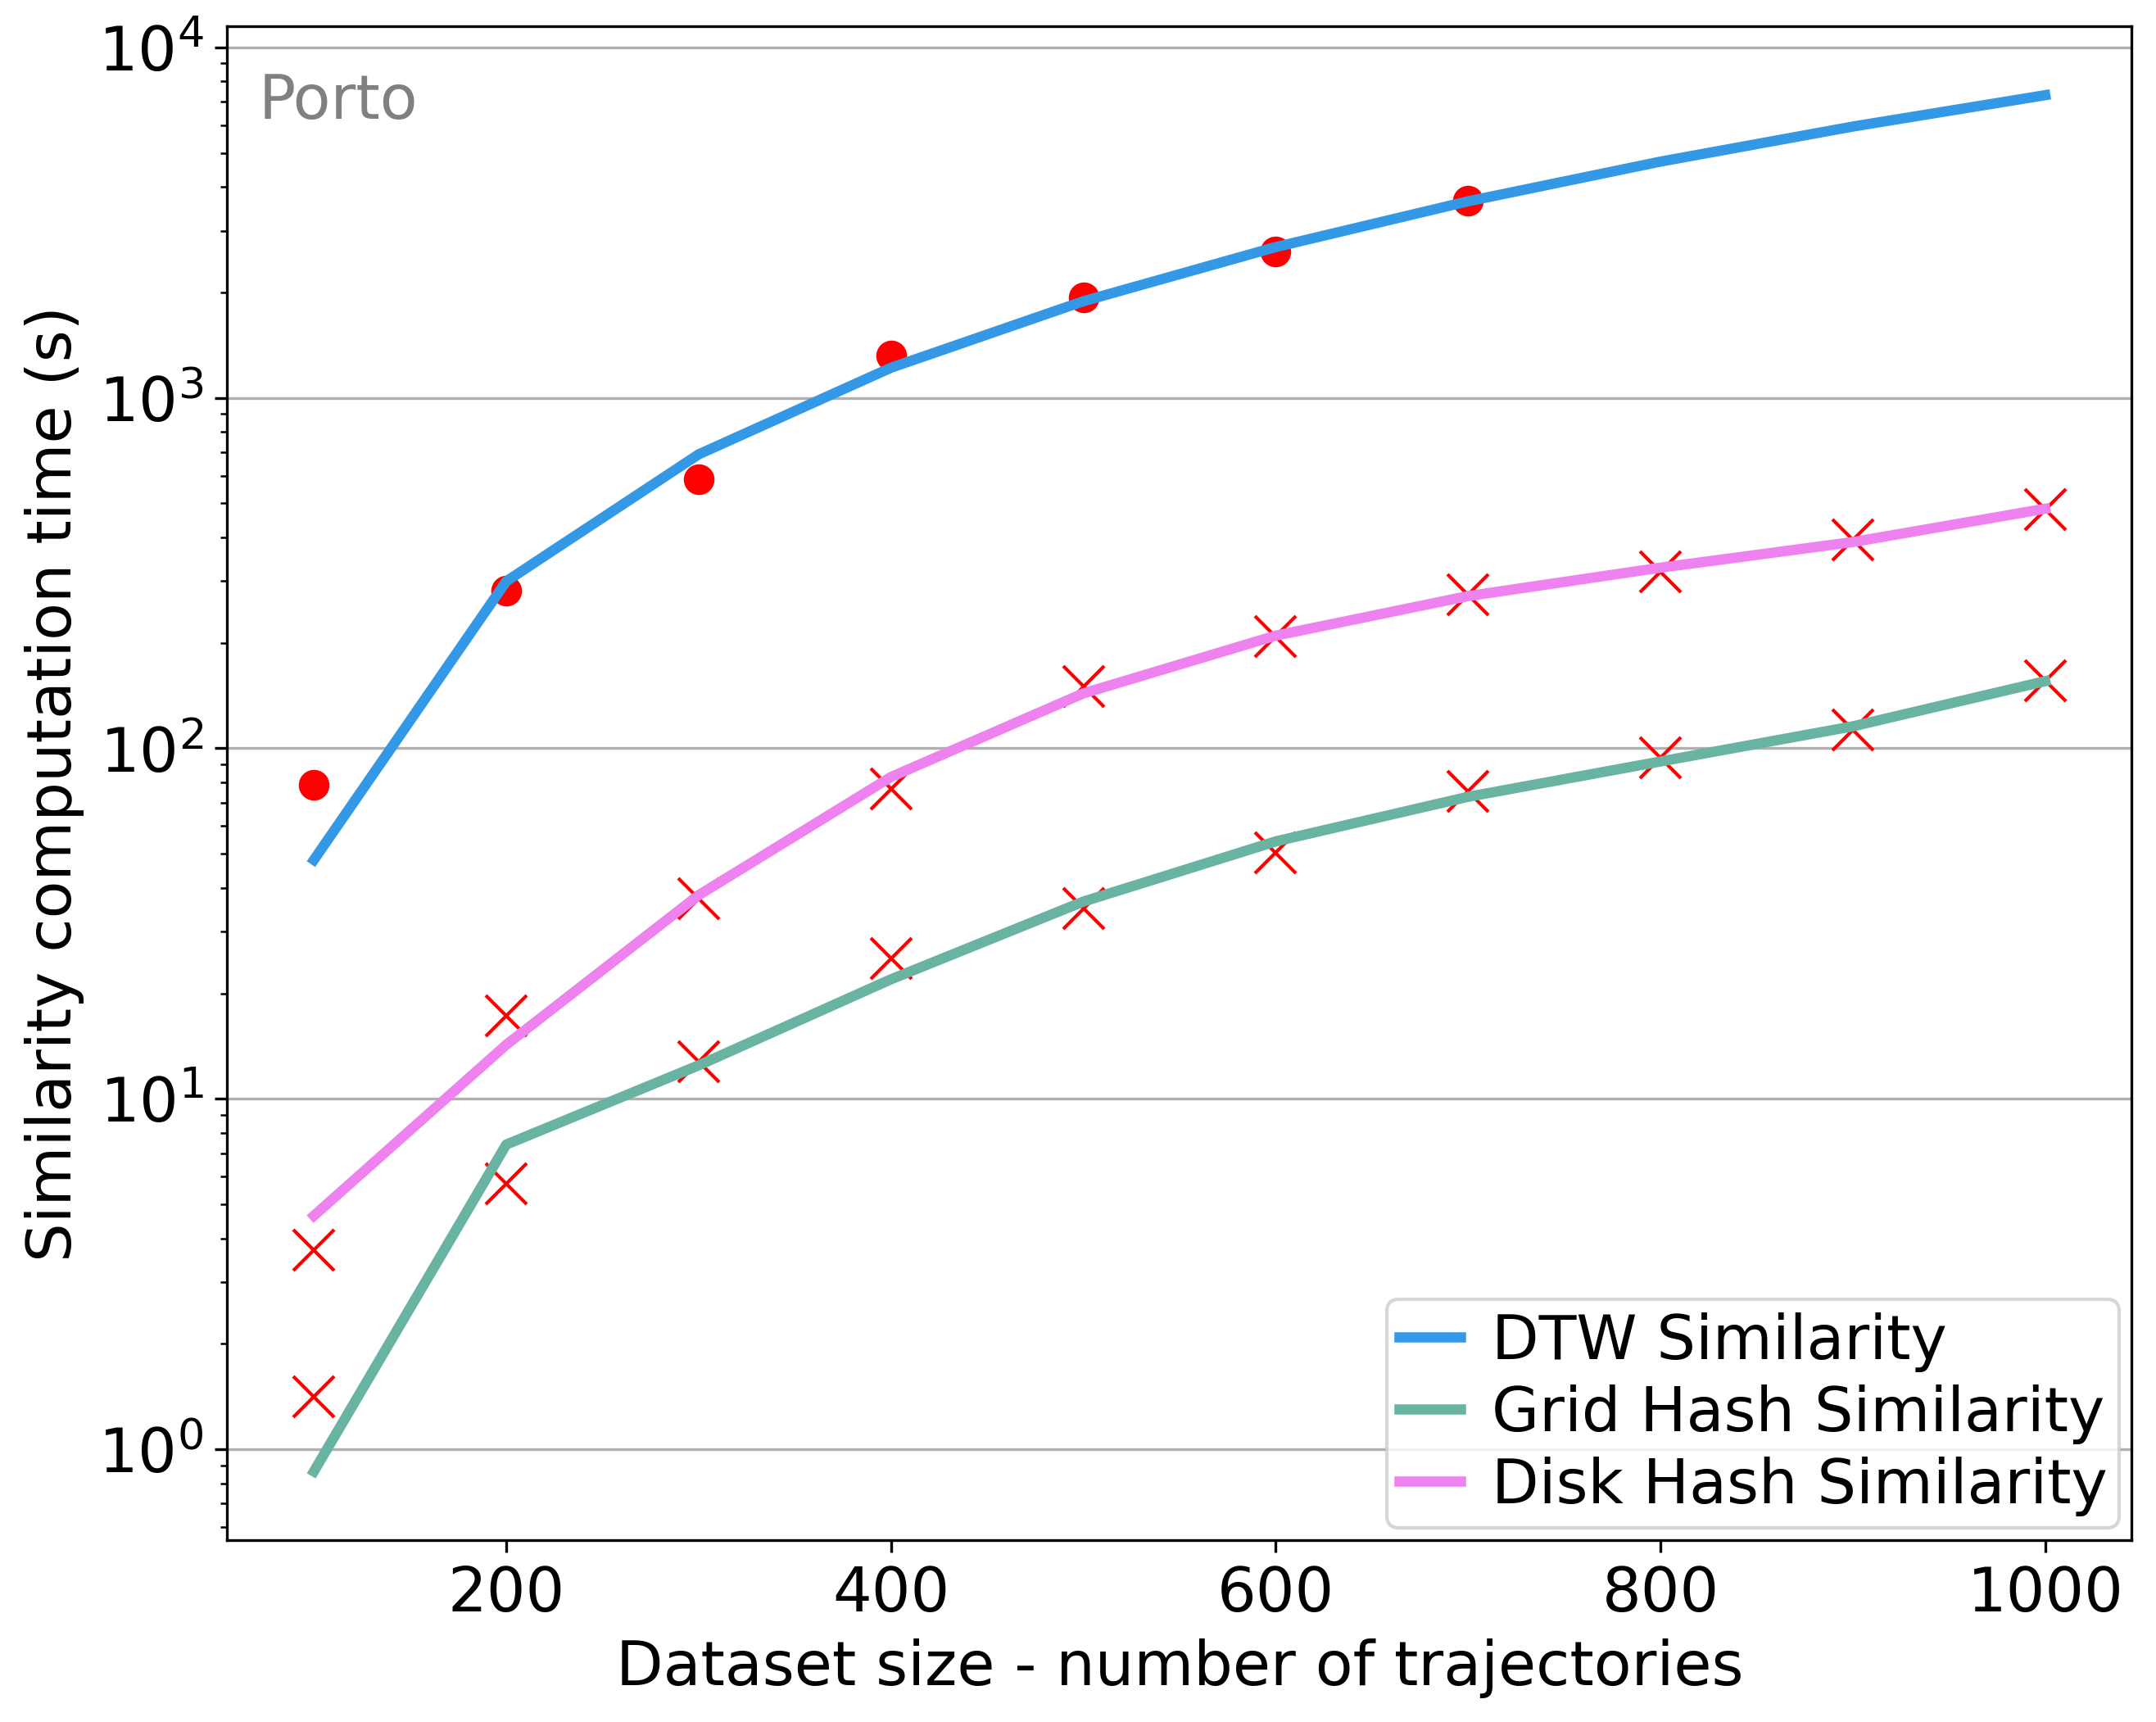

In [ ]:
# Generating a figure visualising the computation runtime of the hashes over Porto
from utils.figure_creator import draw_hash_similarity_runtime_logarithmic
import os
grid_path = os.path.abspath("../code/experiments/timing/similarity_runtimes_grid_porto.csv")
disk_path = os.path.abspath("../code/experiments/timing/similarity_runtimes_disk_porto.csv")
referencepath = os.path.abspath("../code/experiments/timing/similarity_runtimes_true_dtw_porto.csv")
city = "Porto"
draw_hash_similarity_runtime_logarithmic(city, grid_path, disk_path, path_to_reference=referencepath)

# Runtimes of disk similarity computations

In [ ]:
from experiments.disk_similarity import measure_disk_hash_similarity_computation_time
import pandas as pd

In [ ]:
# Measuring Disk Porto similarity computation times // amalie: tok 105min

runs = 10
data_sets = range(100,1001,100)
output_folder = "../code/experiments/timing/"
file_name = "similarity_runtimes_disk_porto.csv"

df = pd.DataFrame( index=[f"run_{x+1}" for x in range(runs)], columns=[x for x in data_sets])

for size in data_sets:
    print(f"Computing size {size}", end="\r")
    execution_times = measure_disk_hash_similarity_computation_time("porto", size, 2.2, 4, 60,"kd", measure="dtw", parallell_jobs=10)
    df[size] = execution_times

df.to_csv(os.path.join(output_folder, file_name))
df

100        200        300         400         500         600   \
run_1   8.593750  43.734375  92.812500  192.421875  201.109375  310.109375   
run_2   8.906250  44.140625  93.937500  189.906250  202.359375  310.515625   
run_3   8.984375  43.171875  94.468750  190.328125  202.171875  310.109375   
run_4   8.687500  43.671875  93.890625  188.625000  199.421875  312.359375   
run_5   9.062500  43.171875  95.218750  189.093750  204.015625  312.875000   
run_6   8.875000  43.718750  95.937500  188.234375  199.609375  309.390625   
run_7   8.593750  43.671875  94.625000  189.843750  200.718750  308.843750   
run_8   9.078125  44.281250  95.531250  189.140625  200.953125  306.890625   
run_9   8.906250  43.437500  94.453125  189.515625  200.171875  306.859375   
run_10  8.406250  43.234375  92.578125  189.140625  199.031250  311.687500   

              700         800         900          1000  
run_1   636.515625  652.265625  837.875000  1432.859375  
run_2   638.140625  650.906250  836.203125  1435.203125  
run_3   635.390625  651.953125  841.390625  1437.921875  
run_4   635.734375  642.593750  841.046875  1428.921875  
run_5   634.484375  650.796875  846.234375  1433.109375  
run_6   631.593750  654.718750  839.453125  1443.859375  
run_7   635.968750  651.890625  838.906250  1439.312500  
run_8   635.109375  647.203125  838.656250  1424.078125  
run_9   632.406250  651.843750  842.843750  1440.296875  
run_10  633.000000  650.703125  836.765625  1445.984375

# Computing variance from 10 different runs

In [ ]:
from experiments.correlation import compute_correlation_similarity

In [ ]:
compute_correlation_similarity("porto", "grid", 10)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\47412\\master\\lsh-kode\\master\\code\\benchmarks\\similarities\\porto-frechet.csv'

In [ ]:
compute_correlation_similarity("porto", "disk", 10)

Run : 0
Run : 1
Run : 2
Run : 3
Run : 4
Run : 5
Run : 6
Run : 7
Run : 8
Run : 9
porto disk : (min, max, avg, std)
DTW: 0.6377392101073246 0.6942677834873745 0.6661029222780737 0.01677821895827129
FRE: 0.8294638409106131 0.8592444080913653 0.8433878899048948 0.01206334020929217
